# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 26988 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past, max_distance=2)


  0% (    1 of 26988) |           | Elapsed Time: 0:00:27 ETA:  8 days, 14:56:16

  0% (   69 of 26988) |                    | Elapsed Time: 0:00:28 ETA:  0:06:10

  0% (  138 of 26988) |                    | Elapsed Time: 0:00:29 ETA:  0:06:06

  0% (  207 of 26988) |                    | Elapsed Time: 0:00:30 ETA:  0:06:04

  1% (  279 of 26988) |                    | Elapsed Time: 0:00:31 ETA:  0:05:58

  1% (  338 of 26988) |                    | Elapsed Time: 0:00:32 ETA:  0:05:53

  1% (  406 of 26988) |                    | Elapsed Time: 0:00:33 ETA:  0:05:54

  1% (  477 of 26988) |                    | Elapsed Time: 0:00:34 ETA:  0:05:52

  2% (  546 of 26988) |                    | Elapsed Time: 0:00:35 ETA:  0:05:52

  2% (  614 of 26988) |                    | Elapsed Time: 0:00:36 ETA:  0:05:52

  2% (  675 of 26988) |                    | Elapsed Time: 0:00:37 ETA:  0:05:53

  2% (  744 of 26988) |                    | Elapsed Time: 0:00:38 ETA:  0:05:52

  3% (  813 of 26988) |                    | Elapsed Time: 0:00:39 ETA:  0:05:51

  3% (  887 of 26988) |                    | Elapsed Time: 0:00:40 ETA:  0:05:49

  3% (  959 of 26988) |                    | Elapsed Time: 0:00:41 ETA:  0:05:49

  3% ( 1013 of 26988) |                    | Elapsed Time: 0:00:42 ETA:  0:05:47

  3% ( 1041 of 26988) |                    | Elapsed Time: 0:00:43 ETA:  0:06:27

  4% ( 1113 of 26988) |                    | Elapsed Time: 0:00:44 ETA:  0:06:24

  4% ( 1186 of 26988) |                    | Elapsed Time: 0:00:45 ETA:  0:06:19

  4% ( 1261 of 26988) |                    | Elapsed Time: 0:00:46 ETA:  0:06:11

  5% ( 1350 of 26988) |#                   | Elapsed Time: 0:00:47 ETA:  0:06:06

  5% ( 1426 of 26988) |#                   | Elapsed Time: 0:00:48 ETA:  0:06:04

  5% ( 1502 of 26988) |#                   | Elapsed Time: 0:00:49 ETA:  0:06:00

  5% ( 1577 of 26988) |#                   | Elapsed Time: 0:00:50 ETA:  0:05:55

  6% ( 1652 of 26988) |#                   | Elapsed Time: 0:00:51 ETA:  0:05:12

  6% ( 1687 of 26988) |#                   | Elapsed Time: 0:00:52 ETA:  0:05:12

  6% ( 1760 of 26988) |#                   | Elapsed Time: 0:00:53 ETA:  0:05:11

  6% ( 1829 of 26988) |#                   | Elapsed Time: 0:00:54 ETA:  0:05:14

  7% ( 1901 of 26988) |#                   | Elapsed Time: 0:00:55 ETA:  0:05:16

  7% ( 1975 of 26988) |#                   | Elapsed Time: 0:00:56 ETA:  0:05:14

  7% ( 2025 of 26988) |#                   | Elapsed Time: 0:00:56 ETA:  0:05:15

  7% ( 2098 of 26988) |#                   | Elapsed Time: 0:00:57 ETA:  0:05:16

  8% ( 2172 of 26988) |#                   | Elapsed Time: 0:00:58 ETA:  0:05:15

  8% ( 2244 of 26988) |#                   | Elapsed Time: 0:00:59 ETA:  0:05:16

  8% ( 2315 of 26988) |#                   | Elapsed Time: 0:01:00 ETA:  0:05:15

  8% ( 2362 of 26988) |#                   | Elapsed Time: 0:01:01 ETA:  0:05:14

  9% ( 2431 of 26988) |#                   | Elapsed Time: 0:01:02 ETA:  0:05:13

  9% ( 2504 of 26988) |#                   | Elapsed Time: 0:01:03 ETA:  0:05:11

  9% ( 2576 of 26988) |#                   | Elapsed Time: 0:01:04 ETA:  0:05:11

  9% ( 2645 of 26988) |#                   | Elapsed Time: 0:01:05 ETA:  0:05:13

 10% ( 2699 of 26988) |##                  | Elapsed Time: 0:01:06 ETA:  0:05:12

 10% ( 2771 of 26988) |##                  | Elapsed Time: 0:01:07 ETA:  0:05:12

 10% ( 2835 of 26988) |##                  | Elapsed Time: 0:01:08 ETA:  0:05:17

 10% ( 2897 of 26988) |##                  | Elapsed Time: 0:01:09 ETA:  0:05:22

 10% ( 2961 of 26988) |##                  | Elapsed Time: 0:01:10 ETA:  0:05:26

 11% ( 3037 of 26988) |##                  | Elapsed Time: 0:01:11 ETA:  0:05:33

 11% ( 3105 of 26988) |##                  | Elapsed Time: 0:01:12 ETA:  0:05:34

 11% ( 3173 of 26988) |##                  | Elapsed Time: 0:01:13 ETA:  0:05:33

 12% ( 3247 of 26988) |##                  | Elapsed Time: 0:01:14 ETA:  0:05:31

 12% ( 3320 of 26988) |##                  | Elapsed Time: 0:01:15 ETA:  0:05:28

 12% ( 3374 of 26988) |##                  | Elapsed Time: 0:01:16 ETA:  0:05:23

 12% ( 3447 of 26988) |##                  | Elapsed Time: 0:01:17 ETA:  0:05:14

 13% ( 3514 of 26988) |##                  | Elapsed Time: 0:01:18 ETA:  0:05:10

 13% ( 3587 of 26988) |##                  | Elapsed Time: 0:01:19 ETA:  0:05:02

 13% ( 3667 of 26988) |##                  | Elapsed Time: 0:01:20 ETA:  0:04:56

 13% ( 3711 of 26988) |##                  | Elapsed Time: 0:01:20 ETA:  0:04:50

 14% ( 3785 of 26988) |##                  | Elapsed Time: 0:01:21 ETA:  0:04:46

 14% ( 3857 of 26988) |##                  | Elapsed Time: 0:01:22 ETA:  0:04:46

 14% ( 3927 of 26988) |##                  | Elapsed Time: 0:01:23 ETA:  0:04:47

 14% ( 4005 of 26988) |##                  | Elapsed Time: 0:01:24 ETA:  0:04:42

 15% ( 4049 of 26988) |###                 | Elapsed Time: 0:01:25 ETA:  0:04:40

 15% ( 4122 of 26988) |###                 | Elapsed Time: 0:01:26 ETA:  0:04:36

 15% ( 4202 of 26988) |###                 | Elapsed Time: 0:01:27 ETA:  0:04:31

 15% ( 4206 of 26988) |###                 | Elapsed Time: 0:01:28 ETA:  0:05:25

 15% ( 4279 of 26988) |###                 | Elapsed Time: 0:01:29 ETA:  0:05:25

 16% ( 4355 of 26988) |###                 | Elapsed Time: 0:01:30 ETA:  0:05:22

 16% ( 4386 of 26988) |###                 | Elapsed Time: 0:01:31 ETA:  0:05:25

 16% ( 4456 of 26988) |###                 | Elapsed Time: 0:01:32 ETA:  0:05:24

 16% ( 4530 of 26988) |###                 | Elapsed Time: 0:01:33 ETA:  0:05:26

 17% ( 4605 of 26988) |###                 | Elapsed Time: 0:01:34 ETA:  0:05:22

 17% ( 4677 of 26988) |###                 | Elapsed Time: 0:01:35 ETA:  0:05:22

 17% ( 4723 of 26988) |###                 | Elapsed Time: 0:01:35 ETA:  0:05:29

 17% ( 4794 of 26988) |###                 | Elapsed Time: 0:01:36 ETA:  0:04:36

 18% ( 4868 of 26988) |###                 | Elapsed Time: 0:01:37 ETA:  0:04:35

 18% ( 4939 of 26988) |###                 | Elapsed Time: 0:01:38 ETA:  0:04:37

 18% ( 5013 of 26988) |###                 | Elapsed Time: 0:01:39 ETA:  0:04:35

 18% ( 5061 of 26988) |###                 | Elapsed Time: 0:01:40 ETA:  0:04:33

 19% ( 5130 of 26988) |###                 | Elapsed Time: 0:01:41 ETA:  0:04:35

 19% ( 5200 of 26988) |###                 | Elapsed Time: 0:01:42 ETA:  0:04:37

 19% ( 5269 of 26988) |###                 | Elapsed Time: 0:01:43 ETA:  0:04:38

 19% ( 5333 of 26988) |###                 | Elapsed Time: 0:01:44 ETA:  0:04:42

 20% ( 5398 of 26988) |####                | Elapsed Time: 0:01:45 ETA:  0:04:42

 20% ( 5470 of 26988) |####                | Elapsed Time: 0:01:46 ETA:  0:04:43

 20% ( 5539 of 26988) |####                | Elapsed Time: 0:01:47 ETA:  0:04:42

 20% ( 5611 of 26988) |####                | Elapsed Time: 0:01:48 ETA:  0:04:42

 21% ( 5682 of 26988) |####                | Elapsed Time: 0:01:49 ETA:  0:04:42

 21% ( 5735 of 26988) |####                | Elapsed Time: 0:01:50 ETA:  0:04:41

 21% ( 5803 of 26988) |####                | Elapsed Time: 0:01:51 ETA:  0:04:41

 21% ( 5874 of 26988) |####                | Elapsed Time: 0:01:52 ETA:  0:04:39

 22% ( 5946 of 26988) |####                | Elapsed Time: 0:01:53 ETA:  0:04:33

 22% ( 6020 of 26988) |####                | Elapsed Time: 0:01:54 ETA:  0:04:28

 22% ( 6073 of 26988) |####                | Elapsed Time: 0:01:54 ETA:  0:04:25

 22% ( 6147 of 26988) |####                | Elapsed Time: 0:01:56 ETA:  0:04:21

 23% ( 6219 of 26988) |####                | Elapsed Time: 0:01:57 ETA:  0:04:20

 23% ( 6284 of 26988) |####                | Elapsed Time: 0:01:58 ETA:  0:04:22

 23% ( 6354 of 26988) |####                | Elapsed Time: 0:01:59 ETA:  0:04:21

 23% ( 6410 of 26988) |####                | Elapsed Time: 0:01:59 ETA:  0:04:16

 24% ( 6479 of 26988) |####                | Elapsed Time: 0:02:00 ETA:  0:04:17

 24% ( 6550 of 26988) |####                | Elapsed Time: 0:02:01 ETA:  0:04:16

 24% ( 6621 of 26988) |####                | Elapsed Time: 0:02:02 ETA:  0:04:18

 24% ( 6686 of 26988) |####                | Elapsed Time: 0:02:03 ETA:  0:04:23

 25% ( 6748 of 26988) |#####               | Elapsed Time: 0:02:04 ETA:  0:04:21

 25% ( 6817 of 26988) |#####               | Elapsed Time: 0:02:05 ETA:  0:04:23

 25% ( 6889 of 26988) |#####               | Elapsed Time: 0:02:06 ETA:  0:04:18

 25% ( 6965 of 26988) |#####               | Elapsed Time: 0:02:07 ETA:  0:04:13

 26% ( 7037 of 26988) |#####               | Elapsed Time: 0:02:08 ETA:  0:04:14

 26% ( 7085 of 26988) |#####               | Elapsed Time: 0:02:09 ETA:  0:04:12

 26% ( 7155 of 26988) |#####               | Elapsed Time: 0:02:10 ETA:  0:04:11

 26% ( 7224 of 26988) |#####               | Elapsed Time: 0:02:11 ETA:  0:04:12

 27% ( 7287 of 26988) |#####               | Elapsed Time: 0:02:12 ETA:  0:04:12

 27% ( 7360 of 26988) |#####               | Elapsed Time: 0:02:13 ETA:  0:04:13

 27% ( 7422 of 26988) |#####               | Elapsed Time: 0:02:14 ETA:  0:04:14

 27% ( 7492 of 26988) |#####               | Elapsed Time: 0:02:15 ETA:  0:04:14

 28% ( 7565 of 26988) |#####               | Elapsed Time: 0:02:16 ETA:  0:04:15

 28% ( 7635 of 26988) |#####               | Elapsed Time: 0:02:17 ETA:  0:04:15

 28% ( 7698 of 26988) |#####               | Elapsed Time: 0:02:18 ETA:  0:04:20

 28% ( 7760 of 26988) |#####               | Elapsed Time: 0:02:19 ETA:  0:04:21

 29% ( 7831 of 26988) |#####               | Elapsed Time: 0:02:20 ETA:  0:04:19

 29% ( 7901 of 26988) |#####               | Elapsed Time: 0:02:21 ETA:  0:04:13

 29% ( 7978 of 26988) |#####               | Elapsed Time: 0:02:22 ETA:  0:04:09

 29% ( 8039 of 26988) |#####               | Elapsed Time: 0:02:24 ETA:  0:05:02

 30% ( 8097 of 26988) |######              | Elapsed Time: 0:02:25 ETA:  0:05:03

 30% ( 8165 of 26988) |######              | Elapsed Time: 0:02:26 ETA:  0:05:06

 30% ( 8220 of 26988) |######              | Elapsed Time: 0:02:27 ETA:  0:05:16

 30% ( 8280 of 26988) |######              | Elapsed Time: 0:02:28 ETA:  0:05:17

 30% ( 8345 of 26988) |######              | Elapsed Time: 0:02:29 ETA:  0:05:16

 31% ( 8411 of 26988) |######              | Elapsed Time: 0:02:30 ETA:  0:05:20

 31% ( 8434 of 26988) |######              | Elapsed Time: 0:02:30 ETA:  0:05:28

 31% ( 8501 of 26988) |######              | Elapsed Time: 0:02:31 ETA:  0:05:36

 31% ( 8569 of 26988) |######              | Elapsed Time: 0:02:32 ETA:  0:04:28

 32% ( 8644 of 26988) |######              | Elapsed Time: 0:02:33 ETA:  0:04:21

 32% ( 8708 of 26988) |######              | Elapsed Time: 0:02:34 ETA:  0:04:23

 32% ( 8772 of 26988) |######              | Elapsed Time: 0:02:35 ETA:  0:04:15

 32% ( 8842 of 26988) |######              | Elapsed Time: 0:02:36 ETA:  0:04:06

 33% ( 8915 of 26988) |######              | Elapsed Time: 0:02:37 ETA:  0:03:59

 33% ( 8989 of 26988) |######              | Elapsed Time: 0:02:38 ETA:  0:03:53

 33% ( 9064 of 26988) |######              | Elapsed Time: 0:02:39 ETA:  0:03:47

 33% ( 9109 of 26988) |######              | Elapsed Time: 0:02:40 ETA:  0:03:42

 34% ( 9180 of 26988) |######              | Elapsed Time: 0:02:41 ETA:  0:03:39

 34% ( 9253 of 26988) |######              | Elapsed Time: 0:02:42 ETA:  0:03:39

 34% ( 9326 of 26988) |######              | Elapsed Time: 0:02:43 ETA:  0:03:33

 34% ( 9401 of 26988) |######              | Elapsed Time: 0:02:44 ETA:  0:03:26

 35% ( 9446 of 26988) |#######             | Elapsed Time: 0:02:45 ETA:  0:03:23

 35% ( 9521 of 26988) |#######             | Elapsed Time: 0:02:46 ETA:  0:03:21

 35% ( 9594 of 26988) |#######             | Elapsed Time: 0:02:47 ETA:  0:03:22

 35% ( 9659 of 26988) |#######             | Elapsed Time: 0:02:48 ETA:  0:03:27

 36% ( 9728 of 26988) |#######             | Elapsed Time: 0:02:49 ETA:  0:03:28

 36% ( 9784 of 26988) |#######             | Elapsed Time: 0:02:50 ETA:  0:03:33

 36% ( 9856 of 26988) |#######             | Elapsed Time: 0:02:51 ETA:  0:03:33

 36% ( 9928 of 26988) |#######             | Elapsed Time: 0:02:52 ETA:  0:03:33

 37% ( 9998 of 26988) |#######             | Elapsed Time: 0:02:53 ETA:  0:03:35

 37% (10061 of 26988) |#######             | Elapsed Time: 0:02:54 ETA:  0:03:40

 37% (10121 of 26988) |#######             | Elapsed Time: 0:02:55 ETA:  0:03:45

 37% (10182 of 26988) |#######             | Elapsed Time: 0:02:56 ETA:  0:03:52

 37% (10241 of 26988) |#######             | Elapsed Time: 0:02:57 ETA:  0:03:56

 38% (10306 of 26988) |#######             | Elapsed Time: 0:02:58 ETA:  0:03:58

 38% (10377 of 26988) |#######             | Elapsed Time: 0:02:59 ETA:  0:03:50

 38% (10458 of 26988) |#######             | Elapsed Time: 0:03:00 ETA:  0:03:54

 38% (10519 of 26988) |#######             | Elapsed Time: 0:03:01 ETA:  0:04:00

 39% (10588 of 26988) |#######             | Elapsed Time: 0:03:02 ETA:  0:03:55

 39% (10654 of 26988) |#######             | Elapsed Time: 0:03:03 ETA:  0:03:53

 39% (10714 of 26988) |#######             | Elapsed Time: 0:03:04 ETA:  0:03:52

 40% (10796 of 26988) |########            | Elapsed Time: 0:03:05 ETA:  0:03:39

 40% (10873 of 26988) |########            | Elapsed Time: 0:03:06 ETA:  0:03:33

 40% (10943 of 26988) |########            | Elapsed Time: 0:03:07 ETA:  0:03:34

 40% (11017 of 26988) |########            | Elapsed Time: 0:03:08 ETA:  0:03:27

 41% (11092 of 26988) |########            | Elapsed Time: 0:03:09 ETA:  0:03:16

 41% (11133 of 26988) |########            | Elapsed Time: 0:03:09 ETA:  0:03:12

 41% (11201 of 26988) |########            | Elapsed Time: 0:03:10 ETA:  0:03:08

 41% (11271 of 26988) |########            | Elapsed Time: 0:03:11 ETA:  0:03:01

 41% (11334 of 26988) |########            | Elapsed Time: 0:03:12 ETA:  0:03:06

 42% (11405 of 26988) |########            | Elapsed Time: 0:03:13 ETA:  0:03:06

 42% (11470 of 26988) |########            | Elapsed Time: 0:03:14 ETA:  0:03:10

 42% (11537 of 26988) |########            | Elapsed Time: 0:03:15 ETA:  0:03:10

 43% (11609 of 26988) |########            | Elapsed Time: 0:03:16 ETA:  0:03:11

 43% (11677 of 26988) |########            | Elapsed Time: 0:03:17 ETA:  0:03:15

 43% (11750 of 26988) |########            | Elapsed Time: 0:03:18 ETA:  0:03:15

 43% (11808 of 26988) |########            | Elapsed Time: 0:03:19 ETA:  0:03:14

 44% (11883 of 26988) |########            | Elapsed Time: 0:03:20 ETA:  0:03:10

 44% (11955 of 26988) |########            | Elapsed Time: 0:03:21 ETA:  0:03:03

 44% (12025 of 26988) |########            | Elapsed Time: 0:03:22 ETA:  0:03:03

 44% (12098 of 26988) |########            | Elapsed Time: 0:03:23 ETA:  0:03:00

 45% (12145 of 26988) |#########           | Elapsed Time: 0:03:24 ETA:  0:03:00

 45% (12209 of 26988) |#########           | Elapsed Time: 0:03:25 ETA:  0:03:04

 45% (12273 of 26988) |#########           | Elapsed Time: 0:03:26 ETA:  0:03:05

 45% (12335 of 26988) |#########           | Elapsed Time: 0:03:27 ETA:  0:03:11

 45% (12411 of 26988) |#########           | Elapsed Time: 0:03:28 ETA:  0:03:05

 46% (12482 of 26988) |#########           | Elapsed Time: 0:03:29 ETA:  0:03:03

 46% (12554 of 26988) |#########           | Elapsed Time: 0:03:30 ETA:  0:03:02

 46% (12625 of 26988) |#########           | Elapsed Time: 0:03:31 ETA:  0:03:01

 47% (12691 of 26988) |#########           | Elapsed Time: 0:03:32 ETA:  0:03:04

 47% (12752 of 26988) |#########           | Elapsed Time: 0:03:33 ETA:  0:03:06

 47% (12820 of 26988) |#########           | Elapsed Time: 0:03:34 ETA:  0:03:02

 47% (12823 of 26988) |#########           | Elapsed Time: 0:03:36 ETA:  0:04:33

 47% (12890 of 26988) |#########           | Elapsed Time: 0:03:37 ETA:  0:04:42

 48% (12962 of 26988) |#########           | Elapsed Time: 0:03:38 ETA:  0:04:44

 48% (13028 of 26988) |#########           | Elapsed Time: 0:03:39 ETA:  0:04:50

 48% (13093 of 26988) |#########           | Elapsed Time: 0:03:40 ETA:  0:04:55

 48% (13157 of 26988) |#########           | Elapsed Time: 0:03:41 ETA:  0:05:16

 49% (13232 of 26988) |#########           | Elapsed Time: 0:03:42 ETA:  0:05:01

 49% (13306 of 26988) |#########           | Elapsed Time: 0:03:43 ETA:  0:04:37

 49% (13378 of 26988) |#########           | Elapsed Time: 0:03:44 ETA:  0:02:55

 49% (13450 of 26988) |#########           | Elapsed Time: 0:03:45 ETA:  0:02:50

 50% (13495 of 26988) |##########          | Elapsed Time: 0:03:46 ETA:  0:02:56

 50% (13566 of 26988) |##########          | Elapsed Time: 0:03:47 ETA:  0:02:51

 50% (13633 of 26988) |##########          | Elapsed Time: 0:03:48 ETA:  0:02:48

 50% (13703 of 26988) |##########          | Elapsed Time: 0:03:49 ETA:  0:02:36

 51% (13775 of 26988) |##########          | Elapsed Time: 0:03:50 ETA:  0:02:34

 51% (13832 of 26988) |##########          | Elapsed Time: 0:03:51 ETA:  0:02:35

 51% (13900 of 26988) |##########          | Elapsed Time: 0:03:52 ETA:  0:02:38

 51% (13974 of 26988) |##########          | Elapsed Time: 0:03:53 ETA:  0:02:35

 52% (14042 of 26988) |##########          | Elapsed Time: 0:03:54 ETA:  0:02:37

 52% (14103 of 26988) |##########          | Elapsed Time: 0:03:55 ETA:  0:02:38

 52% (14169 of 26988) |##########          | Elapsed Time: 0:03:56 ETA:  0:02:38

 52% (14237 of 26988) |##########          | Elapsed Time: 0:03:57 ETA:  0:02:37

 53% (14306 of 26988) |##########          | Elapsed Time: 0:03:58 ETA:  0:02:36

 53% (14369 of 26988) |##########          | Elapsed Time: 0:03:59 ETA:  0:02:41

 53% (14436 of 26988) |##########          | Elapsed Time: 0:04:00 ETA:  0:02:43

 53% (14507 of 26988) |##########          | Elapsed Time: 0:04:01 ETA:  0:02:48

 53% (14564 of 26988) |##########          | Elapsed Time: 0:04:02 ETA:  0:02:57

 54% (14624 of 26988) |##########          | Elapsed Time: 0:04:03 ETA:  0:02:58

 54% (14695 of 26988) |##########          | Elapsed Time: 0:04:04 ETA:  0:02:55

 54% (14759 of 26988) |##########          | Elapsed Time: 0:04:05 ETA:  0:02:57

 55% (14844 of 26988) |###########         | Elapsed Time: 0:04:06 ETA:  0:02:49

 55% (14917 of 26988) |###########         | Elapsed Time: 0:04:07 ETA:  0:02:43

 55% (14992 of 26988) |###########         | Elapsed Time: 0:04:08 ETA:  0:02:35

 55% (15055 of 26988) |###########         | Elapsed Time: 0:04:09 ETA:  0:02:37

 56% (15122 of 26988) |###########         | Elapsed Time: 0:04:10 ETA:  0:02:27

 56% (15181 of 26988) |###########         | Elapsed Time: 0:04:11 ETA:  0:02:24

 56% (15241 of 26988) |###########         | Elapsed Time: 0:04:12 ETA:  0:02:30

 56% (15298 of 26988) |###########         | Elapsed Time: 0:04:13 ETA:  0:02:35

 56% (15349 of 26988) |###########         | Elapsed Time: 0:04:14 ETA:  0:02:51

 57% (15411 of 26988) |###########         | Elapsed Time: 0:04:15 ETA:  0:02:53

 57% (15478 of 26988) |###########         | Elapsed Time: 0:04:16 ETA:  0:02:57

 57% (15519 of 26988) |###########         | Elapsed Time: 0:04:17 ETA:  0:03:03

 57% (15588 of 26988) |###########         | Elapsed Time: 0:04:18 ETA:  0:02:57

 58% (15661 of 26988) |###########         | Elapsed Time: 0:04:19 ETA:  0:02:51

 58% (15729 of 26988) |###########         | Elapsed Time: 0:04:20 ETA:  0:02:46

 58% (15796 of 26988) |###########         | Elapsed Time: 0:04:21 ETA:  0:02:40

 58% (15856 of 26988) |###########         | Elapsed Time: 0:04:22 ETA:  0:02:31

 58% (15877 of 26988) |###########         | Elapsed Time: 0:04:23 ETA:  0:03:06

 58% (15918 of 26988) |###########         | Elapsed Time: 0:04:24 ETA:  0:03:32

 59% (15988 of 26988) |###########         | Elapsed Time: 0:04:25 ETA:  0:03:24

 59% (16055 of 26988) |###########         | Elapsed Time: 0:04:26 ETA:  0:03:25

 59% (16127 of 26988) |###########         | Elapsed Time: 0:04:27 ETA:  0:03:25

 60% (16193 of 26988) |############        | Elapsed Time: 0:04:28 ETA:  0:03:25

 60% (16263 of 26988) |############        | Elapsed Time: 0:04:29 ETA:  0:03:21

 60% (16325 of 26988) |############        | Elapsed Time: 0:04:30 ETA:  0:03:13

 60% (16391 of 26988) |############        | Elapsed Time: 0:04:31 ETA:  0:03:05

 60% (16461 of 26988) |############        | Elapsed Time: 0:04:32 ETA:  0:02:25

 61% (16531 of 26988) |############        | Elapsed Time: 0:04:33 ETA:  0:02:06

 61% (16601 of 26988) |############        | Elapsed Time: 0:04:34 ETA:  0:02:04

 61% (16671 of 26988) |############        | Elapsed Time: 0:04:35 ETA:  0:02:04

 62% (16736 of 26988) |############        | Elapsed Time: 0:04:36 ETA:  0:02:05

 62% (16804 of 26988) |############        | Elapsed Time: 0:04:37 ETA:  0:02:05

 62% (16868 of 26988) |############        | Elapsed Time: 0:04:38 ETA:  0:01:55

 62% (16942 of 26988) |############        | Elapsed Time: 0:04:39 ETA:  0:01:49

 63% (17018 of 26988) |############        | Elapsed Time: 0:04:40 ETA:  0:01:43

 63% (17093 of 26988) |############        | Elapsed Time: 0:04:41 ETA:  0:01:39

 63% (17167 of 26988) |############        | Elapsed Time: 0:04:42 ETA:  0:01:36

 63% (17205 of 26988) |############        | Elapsed Time: 0:04:42 ETA:  0:01:35

 64% (17277 of 26988) |############        | Elapsed Time: 0:04:43 ETA:  0:01:33

 64% (17345 of 26988) |############        | Elapsed Time: 0:04:45 ETA:  0:01:30

 64% (17414 of 26988) |############        | Elapsed Time: 0:04:46 ETA:  0:01:29

 64% (17493 of 26988) |############        | Elapsed Time: 0:04:47 ETA:  0:01:25

 65% (17543 of 26988) |#############       | Elapsed Time: 0:04:47 ETA:  0:01:25

 65% (17617 of 26988) |#############       | Elapsed Time: 0:04:48 ETA:  0:01:25

 65% (17688 of 26988) |#############       | Elapsed Time: 0:04:49 ETA:  0:01:26

 65% (17752 of 26988) |#############       | Elapsed Time: 0:04:50 ETA:  0:01:32

 66% (17815 of 26988) |#############       | Elapsed Time: 0:04:51 ETA:  0:01:35

 66% (17880 of 26988) |#############       | Elapsed Time: 0:04:52 ETA:  0:01:34

 66% (17955 of 26988) |#############       | Elapsed Time: 0:04:53 ETA:  0:01:28

 66% (18029 of 26988) |#############       | Elapsed Time: 0:04:54 ETA:  0:01:23

 67% (18099 of 26988) |#############       | Elapsed Time: 0:04:55 ETA:  0:01:28

 67% (18174 of 26988) |#############       | Elapsed Time: 0:04:56 ETA:  0:01:26

 67% (18217 of 26988) |#############       | Elapsed Time: 0:04:57 ETA:  0:01:26

 67% (18288 of 26988) |#############       | Elapsed Time: 0:04:58 ETA:  0:01:25

 68% (18352 of 26988) |#############       | Elapsed Time: 0:04:59 ETA:  0:01:24

 68% (18421 of 26988) |#############       | Elapsed Time: 0:05:00 ETA:  0:01:20

 68% (18490 of 26988) |#############       | Elapsed Time: 0:05:01 ETA:  0:01:21

 68% (18555 of 26988) |#############       | Elapsed Time: 0:05:02 ETA:  0:01:23

 69% (18625 of 26988) |#############       | Elapsed Time: 0:05:03 ETA:  0:01:25

 69% (18690 of 26988) |#############       | Elapsed Time: 0:05:04 ETA:  0:01:27

 69% (18711 of 26988) |#############       | Elapsed Time: 0:05:06 ETA:  0:03:21

 69% (18770 of 26988) |#############       | Elapsed Time: 0:05:07 ETA:  0:03:26

 69% (18831 of 26988) |#############       | Elapsed Time: 0:05:08 ETA:  0:03:35

 70% (18892 of 26988) |##############      | Elapsed Time: 0:05:09 ETA:  0:03:34

 70% (18951 of 26988) |##############      | Elapsed Time: 0:05:10 ETA:  0:03:43

 70% (19008 of 26988) |##############      | Elapsed Time: 0:05:11 ETA:  0:03:54

 70% (19068 of 26988) |##############      | Elapsed Time: 0:05:12 ETA:  0:04:02

 70% (19127 of 26988) |##############      | Elapsed Time: 0:05:13 ETA:  0:04:13

 71% (19188 of 26988) |##############      | Elapsed Time: 0:05:14 ETA:  0:04:18

 71% (19229 of 26988) |##############      | Elapsed Time: 0:05:15 ETA:  0:02:20

 71% (19283 of 26988) |##############      | Elapsed Time: 0:05:16 ETA:  0:02:24

 71% (19343 of 26988) |##############      | Elapsed Time: 0:05:17 ETA:  0:02:24

 71% (19404 of 26988) |##############      | Elapsed Time: 0:05:18 ETA:  0:02:26

 72% (19464 of 26988) |##############      | Elapsed Time: 0:05:19 ETA:  0:02:25

 72% (19522 of 26988) |##############      | Elapsed Time: 0:05:20 ETA:  0:02:23

 72% (19567 of 26988) |##############      | Elapsed Time: 0:05:21 ETA:  0:02:23

 72% (19626 of 26988) |##############      | Elapsed Time: 0:05:22 ETA:  0:02:23

 72% (19683 of 26988) |##############      | Elapsed Time: 0:05:23 ETA:  0:02:25

 73% (19739 of 26988) |##############      | Elapsed Time: 0:05:24 ETA:  0:02:24

 73% (19795 of 26988) |##############      | Elapsed Time: 0:05:25 ETA:  0:02:22

 73% (19853 of 26988) |##############      | Elapsed Time: 0:05:26 ETA:  0:02:23

 73% (19904 of 26988) |##############      | Elapsed Time: 0:05:27 ETA:  0:02:28

 73% (19961 of 26988) |##############      | Elapsed Time: 0:05:28 ETA:  0:02:29

 74% (20018 of 26988) |##############      | Elapsed Time: 0:05:29 ETA:  0:02:29

 74% (20072 of 26988) |##############      | Elapsed Time: 0:05:30 ETA:  0:02:32

 74% (20131 of 26988) |##############      | Elapsed Time: 0:05:31 ETA:  0:02:31

 74% (20186 of 26988) |##############      | Elapsed Time: 0:05:32 ETA:  0:02:32

 75% (20242 of 26988) |###############     | Elapsed Time: 0:05:33 ETA:  0:02:32

 75% (20301 of 26988) |###############     | Elapsed Time: 0:05:34 ETA:  0:02:28

 75% (20356 of 26988) |###############     | Elapsed Time: 0:05:35 ETA:  0:02:29

 75% (20412 of 26988) |###############     | Elapsed Time: 0:05:36 ETA:  0:02:26

 75% (20465 of 26988) |###############     | Elapsed Time: 0:05:37 ETA:  0:02:29

 76% (20522 of 26988) |###############     | Elapsed Time: 0:05:38 ETA:  0:02:28

 76% (20579 of 26988) |###############     | Elapsed Time: 0:05:39 ETA:  0:02:38

 76% (20634 of 26988) |###############     | Elapsed Time: 0:05:40 ETA:  0:02:36

 76% (20691 of 26988) |###############     | Elapsed Time: 0:05:41 ETA:  0:02:33

 76% (20744 of 26988) |###############     | Elapsed Time: 0:05:42 ETA:  0:02:39

 77% (20795 of 26988) |###############     | Elapsed Time: 0:05:43 ETA:  0:02:42

 77% (20849 of 26988) |###############     | Elapsed Time: 0:05:44 ETA:  0:02:44

 77% (20903 of 26988) |###############     | Elapsed Time: 0:05:45 ETA:  0:02:42

 77% (20916 of 26988) |###############     | Elapsed Time: 0:05:45 ETA:  0:02:45

 77% (20969 of 26988) |###############     | Elapsed Time: 0:05:46 ETA:  0:02:37

 77% (21025 of 26988) |###############     | Elapsed Time: 0:05:48 ETA:  0:02:34

 78% (21078 of 26988) |###############     | Elapsed Time: 0:05:49 ETA:  0:02:36

 78% (21134 of 26988) |###############     | Elapsed Time: 0:05:50 ETA:  0:02:36

 78% (21188 of 26988) |###############     | Elapsed Time: 0:05:51 ETA:  0:02:34

 78% (21240 of 26988) |###############     | Elapsed Time: 0:05:52 ETA:  0:02:32

 78% (21254 of 26988) |###############     | Elapsed Time: 0:05:52 ETA:  0:02:34

 78% (21308 of 26988) |###############     | Elapsed Time: 0:05:53 ETA:  0:02:33

 79% (21362 of 26988) |###############     | Elapsed Time: 0:05:54 ETA:  0:02:32

 79% (21415 of 26988) |###############     | Elapsed Time: 0:05:55 ETA:  0:02:31

 79% (21469 of 26988) |###############     | Elapsed Time: 0:05:56 ETA:  0:02:32

 79% (21522 of 26988) |###############     | Elapsed Time: 0:05:57 ETA:  0:02:31

 79% (21574 of 26988) |###############     | Elapsed Time: 0:05:58 ETA:  0:02:36

 80% (21591 of 26988) |################    | Elapsed Time: 0:05:58 ETA:  0:02:35

 80% (21644 of 26988) |################    | Elapsed Time: 0:05:59 ETA:  0:02:33

 80% (21695 of 26988) |################    | Elapsed Time: 0:06:00 ETA:  0:02:32

 80% (21749 of 26988) |################    | Elapsed Time: 0:06:01 ETA:  0:02:31

 80% (21801 of 26988) |################    | Elapsed Time: 0:06:02 ETA:  0:02:32

 80% (21849 of 26988) |################    | Elapsed Time: 0:06:03 ETA:  0:02:37

 81% (21903 of 26988) |################    | Elapsed Time: 0:06:04 ETA:  0:02:36

 81% (21928 of 26988) |################    | Elapsed Time: 0:06:05 ETA:  0:02:38

 81% (21980 of 26988) |################    | Elapsed Time: 0:06:06 ETA:  0:02:36

 81% (22036 of 26988) |################    | Elapsed Time: 0:06:07 ETA:  0:02:32

 81% (22090 of 26988) |################    | Elapsed Time: 0:06:08 ETA:  0:02:29

 82% (22144 of 26988) |################    | Elapsed Time: 0:06:09 ETA:  0:02:26

 82% (22194 of 26988) |################    | Elapsed Time: 0:06:10 ETA:  0:02:29

 82% (22240 of 26988) |################    | Elapsed Time: 0:06:11 ETA:  0:02:35

 82% (22266 of 26988) |################    | Elapsed Time: 0:06:11 ETA:  0:02:26

 82% (22315 of 26988) |################    | Elapsed Time: 0:06:12 ETA:  0:02:32

 82% (22366 of 26988) |################    | Elapsed Time: 0:06:13 ETA:  0:02:31

 83% (22424 of 26988) |################    | Elapsed Time: 0:06:14 ETA:  0:02:23

 83% (22478 of 26988) |################    | Elapsed Time: 0:06:15 ETA:  0:02:24

 83% (22530 of 26988) |################    | Elapsed Time: 0:06:16 ETA:  0:02:26

 83% (22582 of 26988) |################    | Elapsed Time: 0:06:17 ETA:  0:02:27

 83% (22603 of 26988) |################    | Elapsed Time: 0:06:18 ETA:  0:02:21

 83% (22653 of 26988) |################    | Elapsed Time: 0:06:19 ETA:  0:02:16

 84% (22704 of 26988) |################    | Elapsed Time: 0:06:20 ETA:  0:02:21

 84% (22758 of 26988) |################    | Elapsed Time: 0:06:21 ETA:  0:02:13

 84% (22815 of 26988) |################    | Elapsed Time: 0:06:22 ETA:  0:02:05

 84% (22868 of 26988) |################    | Elapsed Time: 0:06:23 ETA:  0:02:10

 84% (22926 of 26988) |################    | Elapsed Time: 0:06:24 ETA:  0:02:04

 85% (22940 of 26988) |#################   | Elapsed Time: 0:06:24 ETA:  0:02:01

 85% (22994 of 26988) |#################   | Elapsed Time: 0:06:25 ETA:  0:01:58

 85% (23042 of 26988) |#################   | Elapsed Time: 0:06:26 ETA:  0:02:06

 85% (23092 of 26988) |#################   | Elapsed Time: 0:06:27 ETA:  0:02:05

 85% (23147 of 26988) |#################   | Elapsed Time: 0:06:28 ETA:  0:01:59

 85% (23202 of 26988) |#################   | Elapsed Time: 0:06:29 ETA:  0:01:57

 86% (23258 of 26988) |#################   | Elapsed Time: 0:06:30 ETA:  0:01:58

 86% (23278 of 26988) |#################   | Elapsed Time: 0:06:30 ETA:  0:01:58

 86% (23332 of 26988) |#################   | Elapsed Time: 0:06:31 ETA:  0:02:01

 86% (23386 of 26988) |#################   | Elapsed Time: 0:06:33 ETA:  0:02:01

 86% (23438 of 26988) |#################   | Elapsed Time: 0:06:34 ETA:  0:02:02

 87% (23490 of 26988) |#################   | Elapsed Time: 0:06:35 ETA:  0:01:56

 87% (23544 of 26988) |#################   | Elapsed Time: 0:06:36 ETA:  0:01:51

 87% (23595 of 26988) |#################   | Elapsed Time: 0:06:37 ETA:  0:01:54

 87% (23615 of 26988) |#################   | Elapsed Time: 0:06:37 ETA:  0:01:56

 87% (23670 of 26988) |#################   | Elapsed Time: 0:06:38 ETA:  0:01:56

 87% (23721 of 26988) |#################   | Elapsed Time: 0:06:39 ETA:  0:01:57

 88% (23775 of 26988) |#################   | Elapsed Time: 0:06:40 ETA:  0:01:56

 88% (23826 of 26988) |#################   | Elapsed Time: 0:06:41 ETA:  0:01:58

 88% (23875 of 26988) |#################   | Elapsed Time: 0:06:42 ETA:  0:01:59

 88% (23927 of 26988) |#################   | Elapsed Time: 0:06:43 ETA:  0:01:58

 88% (23952 of 26988) |#################   | Elapsed Time: 0:06:43 ETA:  0:01:56

 88% (24009 of 26988) |#################   | Elapsed Time: 0:06:44 ETA:  0:01:48

 89% (24063 of 26988) |#################   | Elapsed Time: 0:06:45 ETA:  0:01:45

 89% (24115 of 26988) |#################   | Elapsed Time: 0:06:46 ETA:  0:01:48

 89% (24166 of 26988) |#################   | Elapsed Time: 0:06:47 ETA:  0:01:48

 89% (24219 of 26988) |#################   | Elapsed Time: 0:06:48 ETA:  0:01:48

 89% (24269 of 26988) |#################   | Elapsed Time: 0:06:50 ETA:  0:01:48

 90% (24290 of 26988) |##################  | Elapsed Time: 0:06:50 ETA:  0:01:44

 90% (24345 of 26988) |##################  | Elapsed Time: 0:06:51 ETA:  0:01:41

 90% (24397 of 26988) |##################  | Elapsed Time: 0:06:52 ETA:  0:01:43

 90% (24452 of 26988) |##################  | Elapsed Time: 0:06:53 ETA:  0:01:45

 90% (24509 of 26988) |##################  | Elapsed Time: 0:06:54 ETA:  0:01:41

 91% (24565 of 26988) |##################  | Elapsed Time: 0:06:55 ETA:  0:01:35

 91% (24627 of 26988) |##################  | Elapsed Time: 0:06:56 ETA:  0:01:27

 91% (24685 of 26988) |##################  | Elapsed Time: 0:06:57 ETA:  0:01:17

 91% (24737 of 26988) |##################  | Elapsed Time: 0:06:58 ETA:  0:01:19

 91% (24791 of 26988) |##################  | Elapsed Time: 0:06:59 ETA:  0:01:18

 92% (24846 of 26988) |##################  | Elapsed Time: 0:07:00 ETA:  0:01:14

 92% (24902 of 26988) |##################  | Elapsed Time: 0:07:01 ETA:  0:01:11

 92% (24953 of 26988) |##################  | Elapsed Time: 0:07:02 ETA:  0:01:17

 92% (24964 of 26988) |##################  | Elapsed Time: 0:07:02 ETA:  0:01:19

 92% (25021 of 26988) |##################  | Elapsed Time: 0:07:03 ETA:  0:01:16

 92% (25075 of 26988) |##################  | Elapsed Time: 0:07:04 ETA:  0:01:15

 93% (25128 of 26988) |##################  | Elapsed Time: 0:07:05 ETA:  0:01:18

 93% (25182 of 26988) |##################  | Elapsed Time: 0:07:06 ETA:  0:01:15

 93% (25236 of 26988) |##################  | Elapsed Time: 0:07:07 ETA:  0:01:14

 93% (25287 of 26988) |##################  | Elapsed Time: 0:07:08 ETA:  0:01:16

 93% (25302 of 26988) |##################  | Elapsed Time: 0:07:09 ETA:  0:01:20

 93% (25356 of 26988) |##################  | Elapsed Time: 0:07:10 ETA:  0:01:15

 94% (25411 of 26988) |##################  | Elapsed Time: 0:07:11 ETA:  0:01:13

 94% (25466 of 26988) |##################  | Elapsed Time: 0:07:12 ETA:  0:01:14

 94% (25521 of 26988) |##################  | Elapsed Time: 0:07:13 ETA:  0:01:13

 94% (25575 of 26988) |##################  | Elapsed Time: 0:07:14 ETA:  0:01:11

 94% (25628 of 26988) |##################  | Elapsed Time: 0:07:15 ETA:  0:01:11

 95% (25639 of 26988) |################### | Elapsed Time: 0:07:15 ETA:  0:01:14

 95% (25692 of 26988) |################### | Elapsed Time: 0:07:16 ETA:  0:01:11

 95% (25745 of 26988) |################### | Elapsed Time: 0:07:17 ETA:  0:01:10

 95% (25795 of 26988) |################### | Elapsed Time: 0:07:18 ETA:  0:01:13

 95% (25847 of 26988) |################### | Elapsed Time: 0:07:19 ETA:  0:01:15

 95% (25900 of 26988) |################### | Elapsed Time: 0:07:20 ETA:  0:01:16

 96% (25913 of 26988) |################### | Elapsed Time: 0:07:24 ETA:  0:05:07

 96% (25976 of 26988) |################### | Elapsed Time: 0:07:25 ETA:  0:05:39

 96% (26026 of 26988) |################### | Elapsed Time: 0:07:26 ETA:  0:05:12

 96% (26082 of 26988) |################### | Elapsed Time: 0:07:27 ETA:  0:05:05

 96% (26132 of 26988) |################### | Elapsed Time: 0:07:28 ETA:  0:05:10

 97% (26184 of 26988) |################### | Elapsed Time: 0:07:29 ETA:  0:05:07

 97% (26232 of 26988) |################### | Elapsed Time: 0:07:30 ETA:  0:05:14

 97% (26280 of 26988) |################### | Elapsed Time: 0:07:31 ETA:  0:05:23

 97% (26314 of 26988) |################### | Elapsed Time: 0:07:32 ETA:  0:01:29

 97% (26368 of 26988) |################### | Elapsed Time: 0:07:33 ETA:  0:01:27

 97% (26423 of 26988) |################### | Elapsed Time: 0:07:34 ETA:  0:01:19

 98% (26479 of 26988) |################### | Elapsed Time: 0:07:35 ETA:  0:01:11

 98% (26531 of 26988) |################### | Elapsed Time: 0:07:36 ETA:  0:01:15

 98% (26581 of 26988) |################### | Elapsed Time: 0:07:37 ETA:  0:01:13

 98% (26634 of 26988) |################### | Elapsed Time: 0:07:38 ETA:  0:01:10

 98% (26651 of 26988) |################### | Elapsed Time: 0:07:38 ETA:  0:01:06

 98% (26703 of 26988) |################### | Elapsed Time: 0:07:39 ETA:  0:01:00

 99% (26755 of 26988) |################### | Elapsed Time: 0:07:40 ETA:  0:00:54

 99% (26809 of 26988) |################### | Elapsed Time: 0:07:41 ETA:  0:00:53

 99% (26864 of 26988) |################### | Elapsed Time: 0:07:42 ETA:  0:00:52

 99% (26913 of 26988) |################### | Elapsed Time: 0:07:43 ETA:  0:00:59

 99% (26964 of 26988) |################### | Elapsed Time: 0:07:44 ETA:  0:00:59

100% (26988 of 26988) |####################| Elapsed Time: 0:07:45 Time: 0:07:45


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

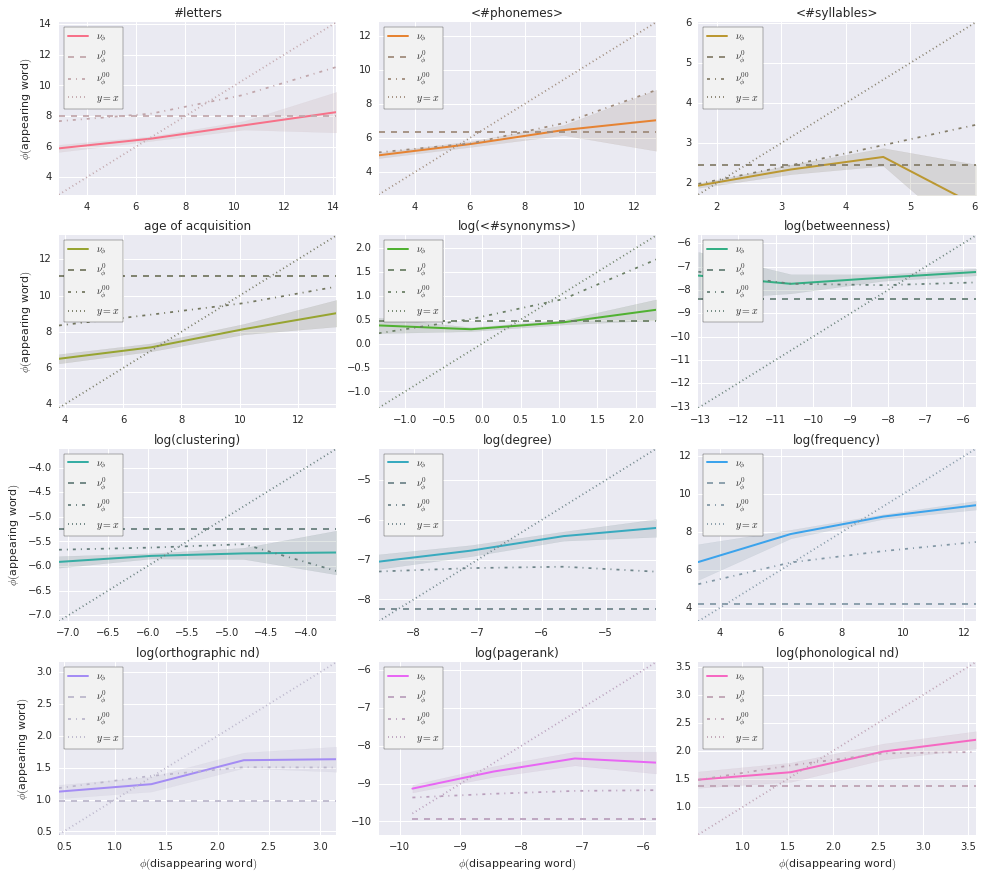

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

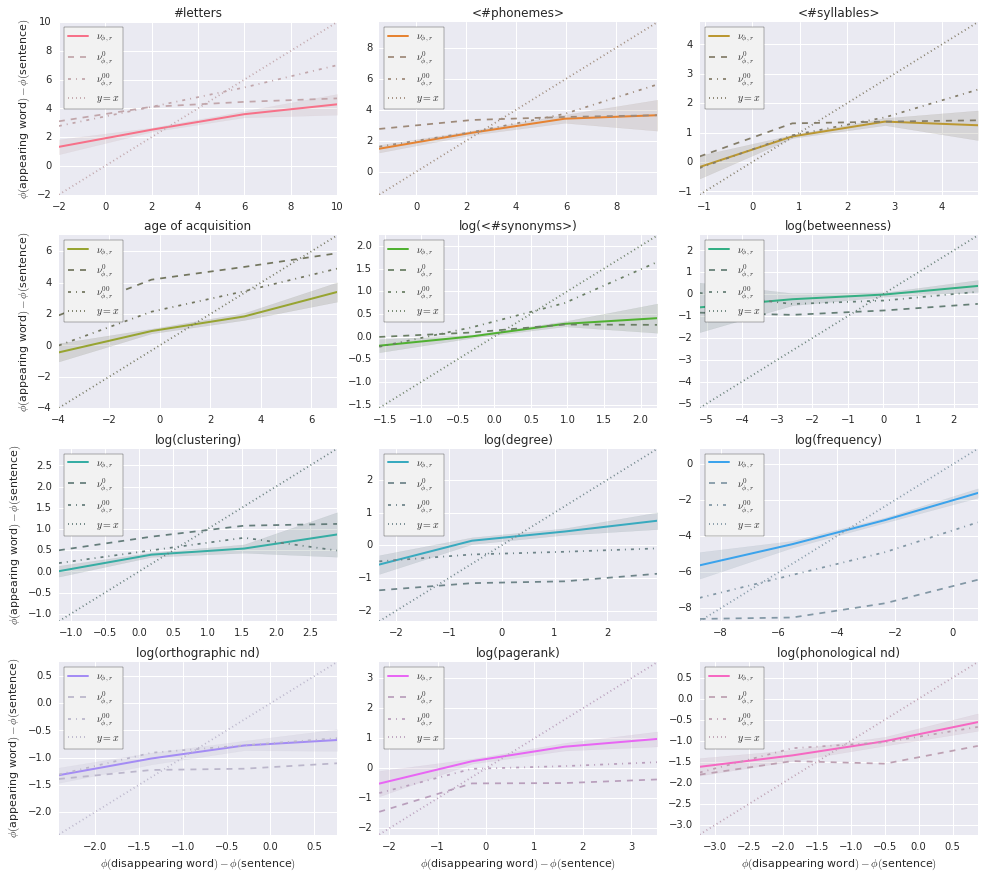

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

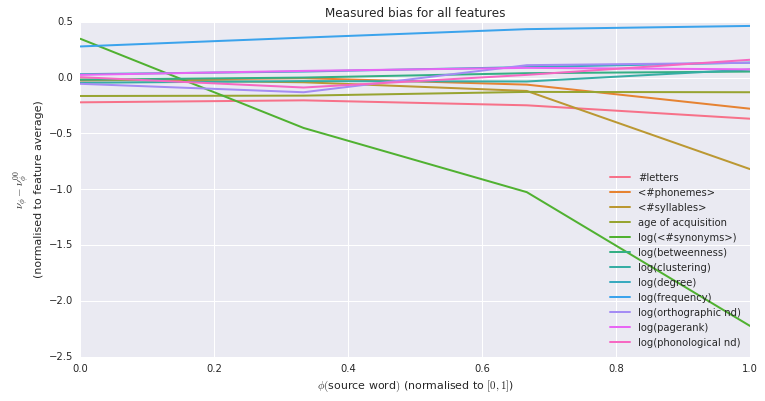

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

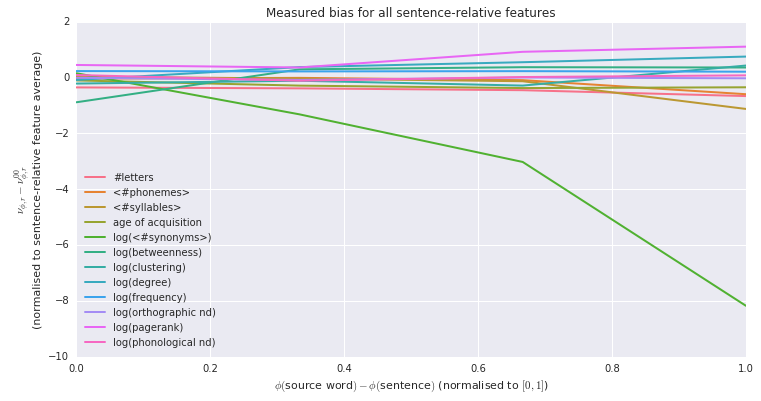

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

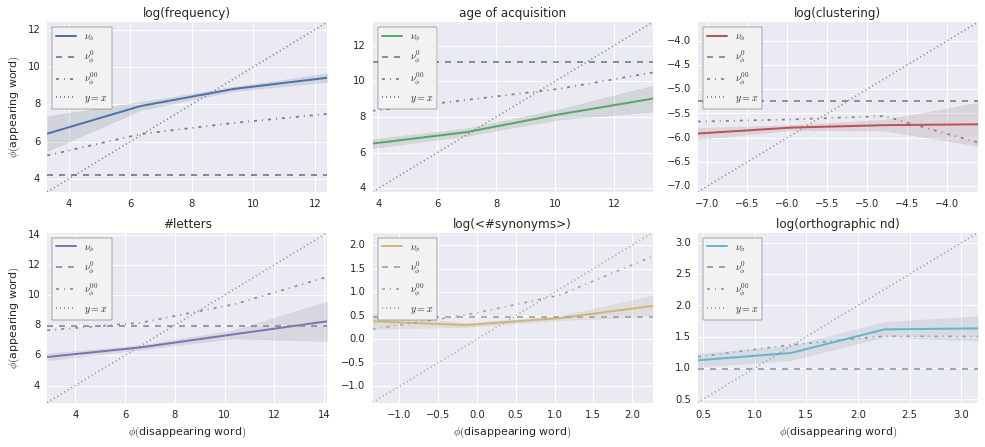

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

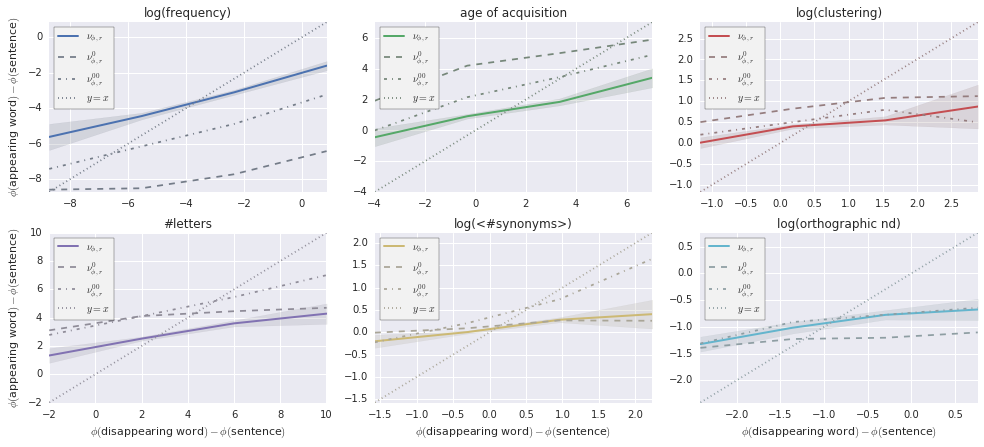

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

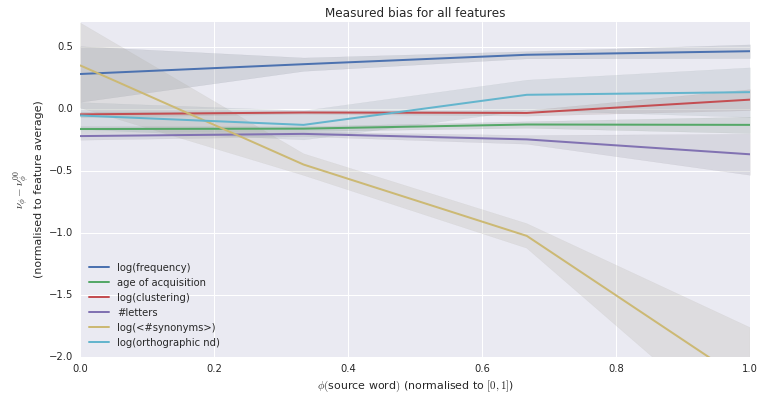

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

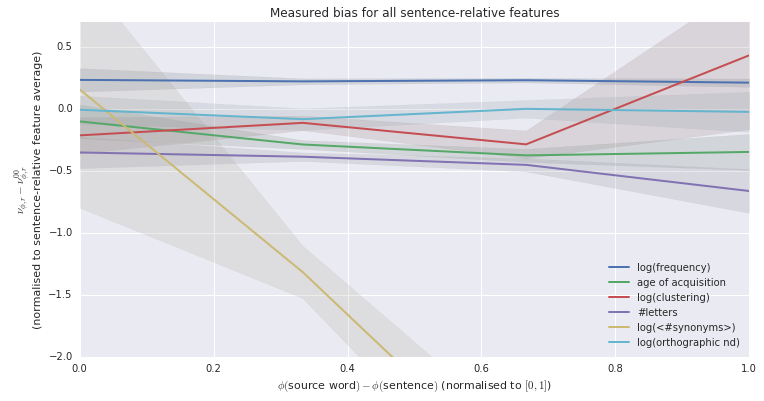

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


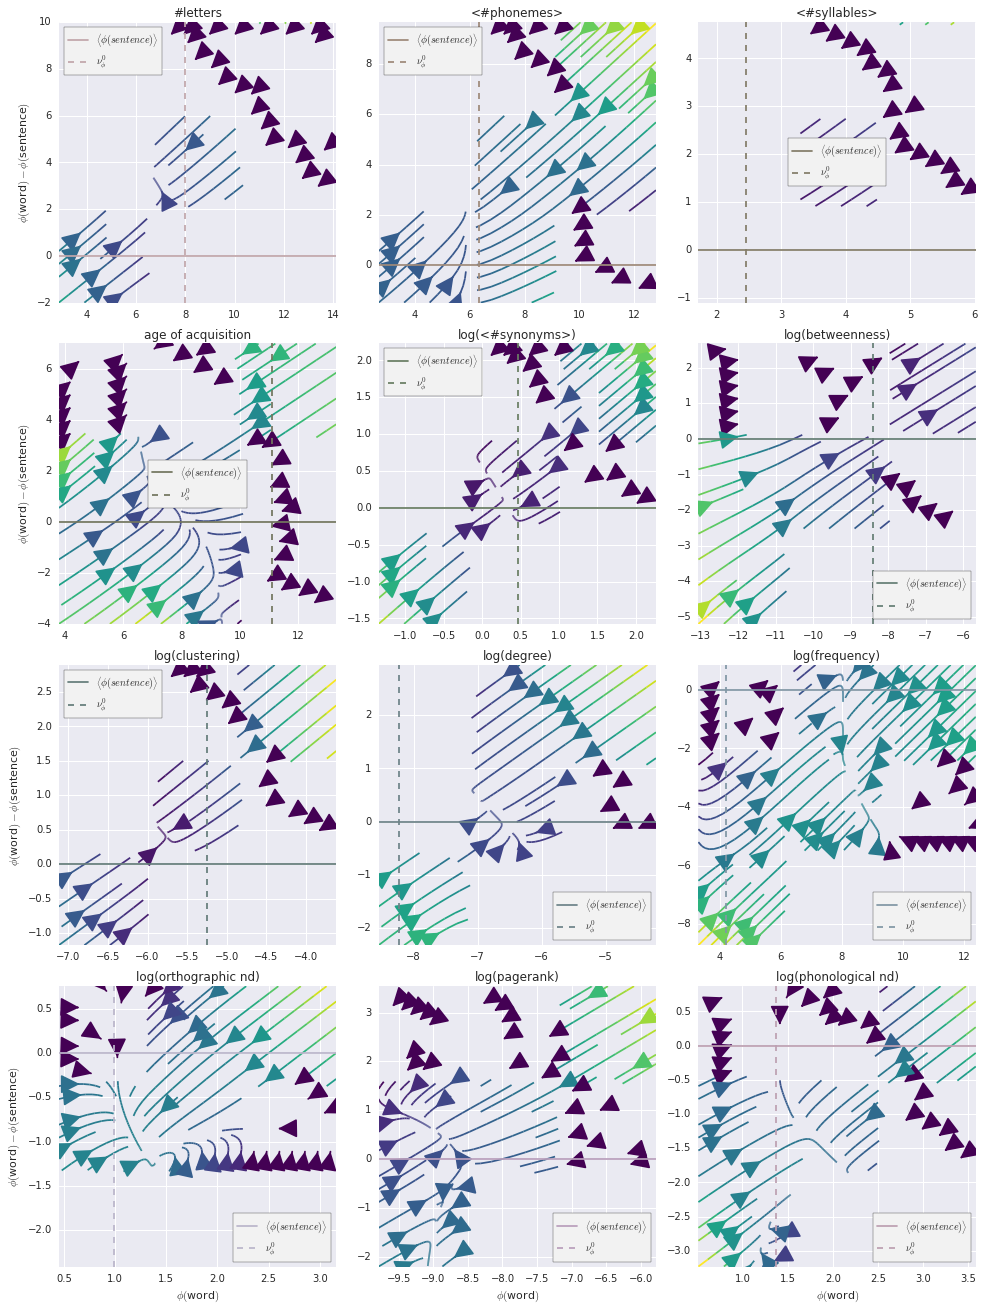

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


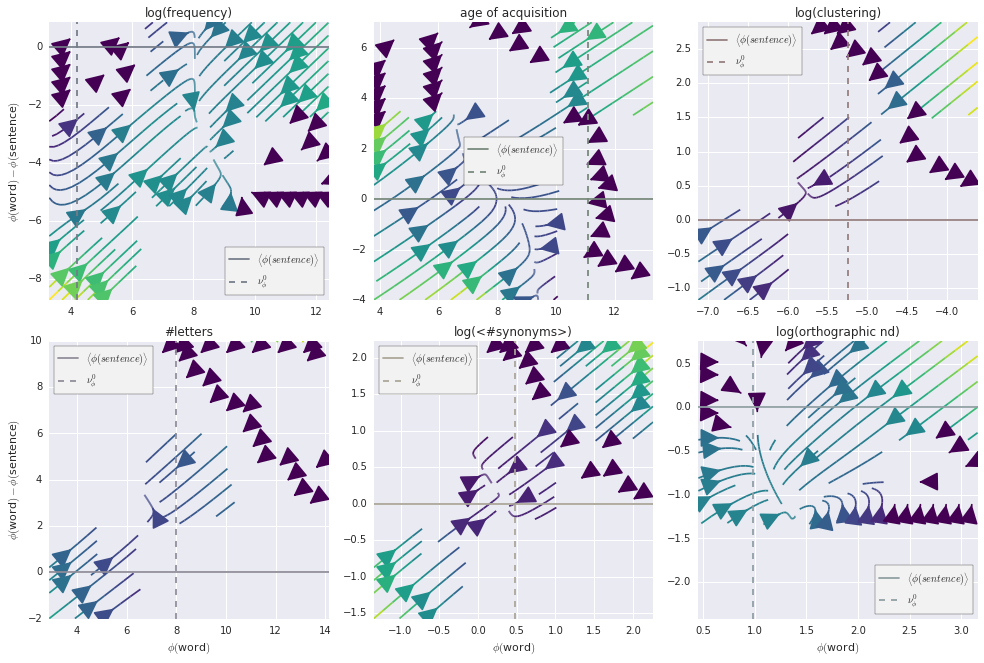

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.54509378  0.16356167  0.0789452   0.07255983  0.03524931  0.03204072
  0.01795882  0.01686319  0.01607968  0.00912383]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.443015,0.271301,-0.082683,0.240179,0.213056,-0.452482,0.216215,0.274677,-0.437132,0.271801,-0.168126,0.007423
Component-1,0.331922,-0.395374,0.150804,-0.305477,-0.282218,-0.424432,0.156824,-0.312902,-0.416552,0.185399,-0.164991,0.006859
Component-2,0.784131,0.303894,-0.134352,0.137344,0.464087,-0.094963,0.026341,0.090042,-0.037282,0.128092,0.012106,-0.068798


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 26988) |          | Elapsed Time: 0:00:56 ETA:  17 days, 13:10:41

  0% (   62 of 26988) |                    | Elapsed Time: 0:00:57 ETA:  0:06:25

  0% (  132 of 26988) |                    | Elapsed Time: 0:00:58 ETA:  0:05:54

  0% (  206 of 26988) |                    | Elapsed Time: 0:00:59 ETA:  0:05:36

  1% (  286 of 26988) |                    | Elapsed Time: 0:01:00 ETA:  0:05:19

  1% (  338 of 26988) |                    | Elapsed Time: 0:01:00 ETA:  0:05:12

  1% (  425 of 26988) |                    | Elapsed Time: 0:01:01 ETA:  0:04:58

  1% (  505 of 26988) |                    | Elapsed Time: 0:01:02 ETA:  0:04:54

  2% (  576 of 26988) |                    | Elapsed Time: 0:01:03 ETA:  0:04:56

  2% (  623 of 26988) |                    | Elapsed Time: 0:01:04 ETA:  0:05:11

  2% (  675 of 26988) |                    | Elapsed Time: 0:01:05 ETA:  0:05:12

  2% (  758 of 26988) |                    | Elapsed Time: 0:01:06 ETA:  0:05:03

  3% (  833 of 26988) |                    | Elapsed Time: 0:01:07 ETA:  0:05:02

  3% (  910 of 26988) |                    | Elapsed Time: 0:01:08 ETA:  0:05:02

  3% (  988 of 26988) |                    | Elapsed Time: 0:01:09 ETA:  0:05:01

  3% ( 1013 of 26988) |                    | Elapsed Time: 0:01:10 ETA:  0:05:12

  4% ( 1087 of 26988) |                    | Elapsed Time: 0:01:11 ETA:  0:05:15

  4% ( 1164 of 26988) |                    | Elapsed Time: 0:01:12 ETA:  0:05:10

  4% ( 1247 of 26988) |                    | Elapsed Time: 0:01:13 ETA:  0:04:47

  5% ( 1350 of 26988) |#                   | Elapsed Time: 0:01:14 ETA:  0:04:31

  5% ( 1439 of 26988) |#                   | Elapsed Time: 0:01:15 ETA:  0:04:22

  5% ( 1529 of 26988) |#                   | Elapsed Time: 0:01:16 ETA:  0:04:15

  5% ( 1619 of 26988) |#                   | Elapsed Time: 0:01:17 ETA:  0:04:07

  6% ( 1687 of 26988) |#                   | Elapsed Time: 0:01:18 ETA:  0:04:01

  6% ( 1778 of 26988) |#                   | Elapsed Time: 0:01:19 ETA:  0:03:52

  6% ( 1870 of 26988) |#                   | Elapsed Time: 0:01:20 ETA:  0:03:44

  7% ( 1960 of 26988) |#                   | Elapsed Time: 0:01:21 ETA:  0:03:40

  7% ( 2025 of 26988) |#                   | Elapsed Time: 0:01:21 ETA:  0:03:37

  7% ( 2122 of 26988) |#                   | Elapsed Time: 0:01:22 ETA:  0:03:34

  8% ( 2211 of 26988) |#                   | Elapsed Time: 0:01:23 ETA:  0:03:33

  8% ( 2303 of 26988) |#                   | Elapsed Time: 0:01:24 ETA:  0:03:31

  8% ( 2362 of 26988) |#                   | Elapsed Time: 0:01:25 ETA:  0:03:31

  8% ( 2408 of 26988) |#                   | Elapsed Time: 0:01:26 ETA:  0:03:49

  9% ( 2478 of 26988) |#                   | Elapsed Time: 0:01:27 ETA:  0:03:57

  9% ( 2554 of 26988) |#                   | Elapsed Time: 0:01:28 ETA:  0:04:03

  9% ( 2626 of 26988) |#                   | Elapsed Time: 0:01:29 ETA:  0:04:12

 10% ( 2699 of 26988) |##                  | Elapsed Time: 0:01:30 ETA:  0:04:37

 10% ( 2784 of 26988) |##                  | Elapsed Time: 0:01:31 ETA:  0:04:39

 10% ( 2837 of 26988) |##                  | Elapsed Time: 0:01:32 ETA:  0:05:05

 10% ( 2892 of 26988) |##                  | Elapsed Time: 0:01:33 ETA:  0:05:23

 10% ( 2947 of 26988) |##                  | Elapsed Time: 0:01:34 ETA:  0:05:15

 11% ( 3000 of 26988) |##                  | Elapsed Time: 0:01:35 ETA:  0:05:28

 11% ( 3037 of 26988) |##                  | Elapsed Time: 0:01:36 ETA:  0:05:40

 11% ( 3091 of 26988) |##                  | Elapsed Time: 0:01:37 ETA:  0:05:55

 11% ( 3170 of 26988) |##                  | Elapsed Time: 0:01:38 ETA:  0:05:41

 12% ( 3243 of 26988) |##                  | Elapsed Time: 0:01:39 ETA:  0:05:31

 12% ( 3313 of 26988) |##                  | Elapsed Time: 0:01:40 ETA:  0:05:42

 12% ( 3374 of 26988) |##                  | Elapsed Time: 0:01:41 ETA:  0:05:25

 12% ( 3446 of 26988) |##                  | Elapsed Time: 0:01:42 ETA:  0:05:12

 13% ( 3514 of 26988) |##                  | Elapsed Time: 0:01:43 ETA:  0:05:01

 13% ( 3595 of 26988) |##                  | Elapsed Time: 0:01:44 ETA:  0:04:40

 13% ( 3711 of 26988) |##                  | Elapsed Time: 0:01:45 ETA:  0:04:05

 14% ( 3803 of 26988) |##                  | Elapsed Time: 0:01:46 ETA:  0:03:56

 14% ( 3889 of 26988) |##                  | Elapsed Time: 0:01:47 ETA:  0:03:48

 14% ( 3984 of 26988) |##                  | Elapsed Time: 0:01:48 ETA:  0:03:35

 15% ( 4049 of 26988) |###                 | Elapsed Time: 0:01:49 ETA:  0:03:30

 15% ( 4119 of 26988) |###                 | Elapsed Time: 0:01:50 ETA:  0:03:29

 15% ( 4212 of 26988) |###                 | Elapsed Time: 0:01:51 ETA:  0:03:17

 15% ( 4299 of 26988) |###                 | Elapsed Time: 0:01:52 ETA:  0:03:14

 16% ( 4386 of 26988) |###                 | Elapsed Time: 0:01:53 ETA:  0:03:16

 16% ( 4481 of 26988) |###                 | Elapsed Time: 0:01:54 ETA:  0:03:13

 17% ( 4588 of 26988) |###                 | Elapsed Time: 0:01:55 ETA:  0:03:07

 17% ( 4689 of 26988) |###                 | Elapsed Time: 0:01:56 ETA:  0:03:00

 17% ( 4723 of 26988) |###                 | Elapsed Time: 0:01:56 ETA:  0:03:00

 17% ( 4807 of 26988) |###                 | Elapsed Time: 0:01:57 ETA:  0:03:01

 18% ( 4873 of 26988) |###                 | Elapsed Time: 0:01:58 ETA:  0:03:01

 18% ( 4937 of 26988) |###                 | Elapsed Time: 0:01:59 ETA:  0:03:12

 18% ( 5001 of 26988) |###                 | Elapsed Time: 0:02:00 ETA:  0:03:22

 18% ( 5061 of 26988) |###                 | Elapsed Time: 0:02:01 ETA:  0:03:28

 19% ( 5136 of 26988) |###                 | Elapsed Time: 0:02:02 ETA:  0:03:37

 19% ( 5233 of 26988) |###                 | Elapsed Time: 0:02:03 ETA:  0:03:40

 19% ( 5315 of 26988) |###                 | Elapsed Time: 0:02:04 ETA:  0:03:50

 19% ( 5384 of 26988) |###                 | Elapsed Time: 0:02:05 ETA:  0:03:58

 20% ( 5398 of 26988) |####                | Elapsed Time: 0:02:05 ETA:  0:04:05

 20% ( 5467 of 26988) |####                | Elapsed Time: 0:02:06 ETA:  0:04:02

 20% ( 5543 of 26988) |####                | Elapsed Time: 0:02:07 ETA:  0:03:54

 20% ( 5625 of 26988) |####                | Elapsed Time: 0:02:08 ETA:  0:03:42

 21% ( 5735 of 26988) |####                | Elapsed Time: 0:02:09 ETA:  0:03:25

 21% ( 5807 of 26988) |####                | Elapsed Time: 0:02:10 ETA:  0:03:39

 21% ( 5896 of 26988) |####                | Elapsed Time: 0:02:11 ETA:  0:03:33

 22% ( 5978 of 26988) |####                | Elapsed Time: 0:02:12 ETA:  0:03:24

 22% ( 6073 of 26988) |####                | Elapsed Time: 0:02:14 ETA:  0:03:10

 22% ( 6161 of 26988) |####                | Elapsed Time: 0:02:15 ETA:  0:03:02

 23% ( 6233 of 26988) |####                | Elapsed Time: 0:02:16 ETA:  0:03:06

 23% ( 6290 of 26988) |####                | Elapsed Time: 0:02:17 ETA:  0:03:27

 23% ( 6380 of 26988) |####                | Elapsed Time: 0:02:18 ETA:  0:03:21

 23% ( 6410 of 26988) |####                | Elapsed Time: 0:02:18 ETA:  0:03:18

 23% ( 6473 of 26988) |####                | Elapsed Time: 0:02:19 ETA:  0:03:32

 24% ( 6556 of 26988) |####                | Elapsed Time: 0:02:20 ETA:  0:03:31

 24% ( 6641 of 26988) |####                | Elapsed Time: 0:02:21 ETA:  0:03:31

 24% ( 6717 of 26988) |####                | Elapsed Time: 0:02:22 ETA:  0:03:31

 25% ( 6748 of 26988) |#####               | Elapsed Time: 0:02:22 ETA:  0:03:35

 25% ( 6830 of 26988) |#####               | Elapsed Time: 0:02:23 ETA:  0:03:28

 25% ( 6914 of 26988) |#####               | Elapsed Time: 0:02:24 ETA:  0:03:12

 25% ( 6999 of 26988) |#####               | Elapsed Time: 0:02:25 ETA:  0:03:14

 26% ( 7085 of 26988) |#####               | Elapsed Time: 0:02:26 ETA:  0:03:05

 26% ( 7179 of 26988) |#####               | Elapsed Time: 0:02:27 ETA:  0:02:49

 26% ( 7256 of 26988) |#####               | Elapsed Time: 0:02:28 ETA:  0:02:51

 27% ( 7343 of 26988) |#####               | Elapsed Time: 0:02:29 ETA:  0:02:49

 27% ( 7422 of 26988) |#####               | Elapsed Time: 0:02:31 ETA:  0:02:55

 27% ( 7480 of 26988) |#####               | Elapsed Time: 0:02:32 ETA:  0:03:06

 28% ( 7570 of 26988) |#####               | Elapsed Time: 0:02:33 ETA:  0:03:01

 28% ( 7656 of 26988) |#####               | Elapsed Time: 0:02:34 ETA:  0:03:00

 28% ( 7722 of 26988) |#####               | Elapsed Time: 0:02:35 ETA:  0:03:13

 28% ( 7760 of 26988) |#####               | Elapsed Time: 0:02:35 ETA:  0:03:26

 28% ( 7819 of 26988) |#####               | Elapsed Time: 0:02:36 ETA:  0:03:37

 29% ( 7898 of 26988) |#####               | Elapsed Time: 0:02:37 ETA:  0:03:41

 29% ( 7984 of 26988) |#####               | Elapsed Time: 0:02:38 ETA:  0:03:31

 29% ( 8059 of 26988) |#####               | Elapsed Time: 0:02:39 ETA:  0:03:25

 30% ( 8097 of 26988) |######              | Elapsed Time: 0:02:40 ETA:  0:03:11

 30% ( 8181 of 26988) |######              | Elapsed Time: 0:02:41 ETA:  0:03:14

 30% ( 8257 of 26988) |######              | Elapsed Time: 0:02:42 ETA:  0:03:19

 30% ( 8307 of 26988) |######              | Elapsed Time: 0:02:43 ETA:  0:03:27

 30% ( 8359 of 26988) |######              | Elapsed Time: 0:02:44 ETA:  0:03:38

 31% ( 8408 of 26988) |######              | Elapsed Time: 0:02:45 ETA:  0:03:43

 31% ( 8434 of 26988) |######              | Elapsed Time: 0:02:45 ETA:  0:03:54

 31% ( 8484 of 26988) |######              | Elapsed Time: 0:02:46 ETA:  0:04:22

 31% ( 8538 of 26988) |######              | Elapsed Time: 0:02:47 ETA:  0:04:41

 31% ( 8595 of 26988) |######              | Elapsed Time: 0:02:48 ETA:  0:04:55

 32% ( 8688 of 26988) |######              | Elapsed Time: 0:02:49 ETA:  0:04:45

 32% ( 8772 of 26988) |######              | Elapsed Time: 0:02:50 ETA:  0:04:28

 32% ( 8804 of 26988) |######              | Elapsed Time: 0:02:55 ETA:  0:08:55

 32% ( 8877 of 26988) |######              | Elapsed Time: 0:02:56 ETA:  0:08:17

 33% ( 8949 of 26988) |######              | Elapsed Time: 0:02:57 ETA:  0:07:44

 33% ( 9020 of 26988) |######              | Elapsed Time: 0:02:58 ETA:  0:07:18

 33% ( 9109 of 26988) |######              | Elapsed Time: 0:02:59 ETA:  0:06:54

 34% ( 9183 of 26988) |######              | Elapsed Time: 0:03:00 ETA:  0:07:16

 34% ( 9258 of 26988) |######              | Elapsed Time: 0:03:01 ETA:  0:07:24

 34% ( 9332 of 26988) |######              | Elapsed Time: 0:03:02 ETA:  0:06:50

 34% ( 9403 of 26988) |######              | Elapsed Time: 0:03:03 ETA:  0:03:02

 35% ( 9446 of 26988) |#######             | Elapsed Time: 0:03:04 ETA:  0:03:02

 35% ( 9526 of 26988) |#######             | Elapsed Time: 0:03:05 ETA:  0:02:56

 35% ( 9610 of 26988) |#######             | Elapsed Time: 0:03:06 ETA:  0:02:47

 35% ( 9661 of 26988) |#######             | Elapsed Time: 0:03:07 ETA:  0:03:06

 36% ( 9723 of 26988) |#######             | Elapsed Time: 0:03:08 ETA:  0:03:12

 36% ( 9767 of 26988) |#######             | Elapsed Time: 0:03:09 ETA:  0:03:30

 36% ( 9784 of 26988) |#######             | Elapsed Time: 0:03:09 ETA:  0:03:42

 36% ( 9847 of 26988) |#######             | Elapsed Time: 0:03:10 ETA:  0:03:50

 36% ( 9940 of 26988) |#######             | Elapsed Time: 0:03:11 ETA:  0:03:31

 37% (10026 of 26988) |#######             | Elapsed Time: 0:03:13 ETA:  0:03:19

 37% (10092 of 26988) |#######             | Elapsed Time: 0:03:14 ETA:  0:03:28

 37% (10121 of 26988) |#######             | Elapsed Time: 0:03:14 ETA:  0:03:51

 37% (10169 of 26988) |#######             | Elapsed Time: 0:03:15 ETA:  0:03:53

 37% (10215 of 26988) |#######             | Elapsed Time: 0:03:16 ETA:  0:04:07

 38% (10278 of 26988) |#######             | Elapsed Time: 0:03:17 ETA:  0:03:50

 38% (10368 of 26988) |#######             | Elapsed Time: 0:03:18 ETA:  0:03:24

 38% (10458 of 26988) |#######             | Elapsed Time: 0:03:19 ETA:  0:03:28

 39% (10534 of 26988) |#######             | Elapsed Time: 0:03:20 ETA:  0:03:35

 39% (10618 of 26988) |#######             | Elapsed Time: 0:03:21 ETA:  0:03:20

 39% (10703 of 26988) |#######             | Elapsed Time: 0:03:22 ETA:  0:02:57

 39% (10774 of 26988) |#######             | Elapsed Time: 0:03:23 ETA:  0:02:41

 40% (10796 of 26988) |########            | Elapsed Time: 0:03:24 ETA:  0:02:20

 40% (10889 of 26988) |########            | Elapsed Time: 0:03:25 ETA:  0:02:02

 40% (10960 of 26988) |########            | Elapsed Time: 0:03:26 ETA:  0:02:12

 40% (11043 of 26988) |########            | Elapsed Time: 0:03:27 ETA:  0:02:09

 41% (11133 of 26988) |########            | Elapsed Time: 0:03:28 ETA:  0:02:01

 41% (11219 of 26988) |########            | Elapsed Time: 0:03:29 ETA:  0:01:55

 41% (11311 of 26988) |########            | Elapsed Time: 0:03:30 ETA:  0:01:50

 42% (11396 of 26988) |########            | Elapsed Time: 0:03:31 ETA:  0:01:49

 42% (11470 of 26988) |########            | Elapsed Time: 0:03:31 ETA:  0:01:40

 42% (11537 of 26988) |########            | Elapsed Time: 0:03:32 ETA:  0:01:47

 43% (11612 of 26988) |########            | Elapsed Time: 0:03:33 ETA:  0:01:54

 43% (11678 of 26988) |########            | Elapsed Time: 0:03:34 ETA:  0:01:56

 43% (11760 of 26988) |########            | Elapsed Time: 0:03:35 ETA:  0:01:55

 43% (11808 of 26988) |########            | Elapsed Time: 0:03:36 ETA:  0:02:04

 44% (11901 of 26988) |########            | Elapsed Time: 0:03:37 ETA:  0:01:59

 44% (11984 of 26988) |########            | Elapsed Time: 0:03:38 ETA:  0:02:02

 44% (12061 of 26988) |########            | Elapsed Time: 0:03:39 ETA:  0:02:05

 45% (12145 of 26988) |#########           | Elapsed Time: 0:03:40 ETA:  0:02:06

 45% (12209 of 26988) |#########           | Elapsed Time: 0:03:41 ETA:  0:02:11

 45% (12285 of 26988) |#########           | Elapsed Time: 0:03:42 ETA:  0:02:05

 45% (12363 of 26988) |#########           | Elapsed Time: 0:03:43 ETA:  0:02:06

 46% (12455 of 26988) |#########           | Elapsed Time: 0:03:44 ETA:  0:01:56

 46% (12482 of 26988) |#########           | Elapsed Time: 0:03:45 ETA:  0:02:05

 46% (12574 of 26988) |#########           | Elapsed Time: 0:03:46 ETA:  0:01:59

 46% (12667 of 26988) |#########           | Elapsed Time: 0:03:47 ETA:  0:01:49

 47% (12737 of 26988) |#########           | Elapsed Time: 0:03:48 ETA:  0:01:52

 47% (12820 of 26988) |#########           | Elapsed Time: 0:03:49 ETA:  0:01:46

 47% (12916 of 26988) |#########           | Elapsed Time: 0:03:50 ETA:  0:01:30

 48% (12989 of 26988) |#########           | Elapsed Time: 0:03:51 ETA:  0:01:30

 48% (13053 of 26988) |#########           | Elapsed Time: 0:03:52 ETA:  0:01:36

 48% (13157 of 26988) |#########           | Elapsed Time: 0:03:53 ETA:  0:01:33

 49% (13253 of 26988) |#########           | Elapsed Time: 0:03:54 ETA:  0:01:30

 49% (13355 of 26988) |#########           | Elapsed Time: 0:03:55 ETA:  0:01:25

 49% (13437 of 26988) |#########           | Elapsed Time: 0:03:56 ETA:  0:01:18

 50% (13495 of 26988) |##########          | Elapsed Time: 0:03:57 ETA:  0:01:19

 50% (13574 of 26988) |##########          | Elapsed Time: 0:03:58 ETA:  0:01:26

 50% (13652 of 26988) |##########          | Elapsed Time: 0:03:59 ETA:  0:01:22

 50% (13723 of 26988) |##########          | Elapsed Time: 0:04:00 ETA:  0:01:17

 51% (13801 of 26988) |##########          | Elapsed Time: 0:04:01 ETA:  0:01:22

 51% (13832 of 26988) |##########          | Elapsed Time: 0:04:01 ETA:  0:01:22

 51% (13899 of 26988) |##########          | Elapsed Time: 0:04:02 ETA:  0:01:36

 51% (13983 of 26988) |##########          | Elapsed Time: 0:04:03 ETA:  0:01:44

 52% (14068 of 26988) |##########          | Elapsed Time: 0:04:04 ETA:  0:01:42

 52% (14145 of 26988) |##########          | Elapsed Time: 0:04:05 ETA:  0:01:43

 52% (14169 of 26988) |##########          | Elapsed Time: 0:04:05 ETA:  0:01:43

 52% (14260 of 26988) |##########          | Elapsed Time: 0:04:06 ETA:  0:01:34

 53% (14351 of 26988) |##########          | Elapsed Time: 0:04:07 ETA:  0:01:23

 53% (14443 of 26988) |##########          | Elapsed Time: 0:04:08 ETA:  0:01:15

 53% (14507 of 26988) |##########          | Elapsed Time: 0:04:09 ETA:  0:01:20

 54% (14602 of 26988) |##########          | Elapsed Time: 0:04:10 ETA:  0:01:06

 54% (14687 of 26988) |##########          | Elapsed Time: 0:04:11 ETA:  0:01:04

 54% (14783 of 26988) |##########          | Elapsed Time: 0:04:12 ETA:  0:00:58

 55% (14844 of 26988) |###########         | Elapsed Time: 0:04:13 ETA:  0:00:55

 55% (14929 of 26988) |###########         | Elapsed Time: 0:04:14 ETA:  0:00:54

 55% (15020 of 26988) |###########         | Elapsed Time: 0:04:15 ETA:  0:00:53

 55% (15102 of 26988) |###########         | Elapsed Time: 0:04:16 ETA:  0:00:56

 56% (15181 of 26988) |###########         | Elapsed Time: 0:04:17 ETA:  0:00:59

 56% (15265 of 26988) |###########         | Elapsed Time: 0:04:18 ETA:  0:00:53

 56% (15354 of 26988) |###########         | Elapsed Time: 0:04:19 ETA:  0:00:55

 57% (15444 of 26988) |###########         | Elapsed Time: 0:04:20 ETA:  0:00:52

 57% (15519 of 26988) |###########         | Elapsed Time: 0:04:21 ETA:  0:00:56

 57% (15610 of 26988) |###########         | Elapsed Time: 0:04:22 ETA:  0:00:51

 58% (15698 of 26988) |###########         | Elapsed Time: 0:04:23 ETA:  0:00:50

 58% (15774 of 26988) |###########         | Elapsed Time: 0:04:24 ETA:  0:00:55

 58% (15856 of 26988) |###########         | Elapsed Time: 0:04:25 ETA:  0:00:53

 59% (15932 of 26988) |###########         | Elapsed Time: 0:04:26 ETA:  0:00:54

 59% (16004 of 26988) |###########         | Elapsed Time: 0:04:27 ETA:  0:00:58

 59% (16071 of 26988) |###########         | Elapsed Time: 0:04:28 ETA:  0:01:07

 59% (16161 of 26988) |###########         | Elapsed Time: 0:04:29 ETA:  0:01:06

 60% (16193 of 26988) |############        | Elapsed Time: 0:04:29 ETA:  0:01:05

 60% (16285 of 26988) |############        | Elapsed Time: 0:04:30 ETA:  0:01:04

 60% (16348 of 26988) |############        | Elapsed Time: 0:04:31 ETA:  0:01:15

 60% (16430 of 26988) |############        | Elapsed Time: 0:04:32 ETA:  0:01:11

 61% (16513 of 26988) |############        | Elapsed Time: 0:04:33 ETA:  0:01:11

 61% (16531 of 26988) |############        | Elapsed Time: 0:04:33 ETA:  0:01:08

 61% (16592 of 26988) |############        | Elapsed Time: 0:04:34 ETA:  0:01:14

 61% (16665 of 26988) |############        | Elapsed Time: 0:04:35 ETA:  0:01:09

 61% (16713 of 26988) |############        | Elapsed Time: 0:04:37 ETA:  0:01:35

 62% (16766 of 26988) |############        | Elapsed Time: 0:04:38 ETA:  0:01:51

 62% (16835 of 26988) |############        | Elapsed Time: 0:04:39 ETA:  0:02:06

 62% (16868 of 26988) |############        | Elapsed Time: 0:04:39 ETA:  0:01:57

 62% (16954 of 26988) |############        | Elapsed Time: 0:04:40 ETA:  0:01:53

 63% (17046 of 26988) |############        | Elapsed Time: 0:04:41 ETA:  0:01:45

 63% (17134 of 26988) |############        | Elapsed Time: 0:04:42 ETA:  0:01:35

 63% (17205 of 26988) |############        | Elapsed Time: 0:04:43 ETA:  0:01:23

 64% (17289 of 26988) |############        | Elapsed Time: 0:04:44 ETA:  0:01:16

 64% (17369 of 26988) |############        | Elapsed Time: 0:04:45 ETA:  0:00:57

 64% (17449 of 26988) |############        | Elapsed Time: 0:04:46 ETA:  0:00:43

 65% (17543 of 26988) |#############       | Elapsed Time: 0:04:47 ETA:  0:00:37

 65% (17620 of 26988) |#############       | Elapsed Time: 0:04:48 ETA:  0:00:41

 65% (17696 of 26988) |#############       | Elapsed Time: 0:04:49 ETA:  0:00:48

 65% (17774 of 26988) |#############       | Elapsed Time: 0:04:50 ETA:  0:00:52

 66% (17851 of 26988) |#############       | Elapsed Time: 0:04:51 ETA:  0:00:53

 66% (17880 of 26988) |#############       | Elapsed Time: 0:04:51 ETA:  0:00:52

 66% (17969 of 26988) |#############       | Elapsed Time: 0:04:52 ETA:  0:00:46

 66% (18064 of 26988) |#############       | Elapsed Time: 0:04:53 ETA:  0:00:37

 67% (18143 of 26988) |#############       | Elapsed Time: 0:04:54 ETA:  0:00:36

 67% (18217 of 26988) |#############       | Elapsed Time: 0:04:55 ETA:  0:00:31

 67% (18302 of 26988) |#############       | Elapsed Time: 0:04:56 ETA:  0:00:27

 67% (18337 of 26988) |#############       | Elapsed Time: 0:04:57 ETA:  0:00:47

 68% (18421 of 26988) |#############       | Elapsed Time: 0:04:58 ETA:  0:00:42

 68% (18493 of 26988) |#############       | Elapsed Time: 0:04:59 ETA:  0:00:44

 68% (18555 of 26988) |#############       | Elapsed Time: 0:05:00 ETA:  0:00:42

 69% (18633 of 26988) |#############       | Elapsed Time: 0:05:01 ETA:  0:00:47

 69% (18687 of 26988) |#############       | Elapsed Time: 0:05:02 ETA:  0:01:09

 69% (18751 of 26988) |#############       | Elapsed Time: 0:05:03 ETA:  0:01:17

 69% (18818 of 26988) |#############       | Elapsed Time: 0:05:04 ETA:  0:01:29

 70% (18892 of 26988) |##############      | Elapsed Time: 0:05:05 ETA:  0:01:25

 70% (18979 of 26988) |##############      | Elapsed Time: 0:05:06 ETA:  0:00:52

 70% (19052 of 26988) |##############      | Elapsed Time: 0:05:07 ETA:  0:00:57

 70% (19124 of 26988) |##############      | Elapsed Time: 0:05:08 ETA:  0:00:56

 71% (19199 of 26988) |##############      | Elapsed Time: 0:05:09 ETA:  0:01:00

 71% (19229 of 26988) |##############      | Elapsed Time: 0:05:09 ETA:  0:01:10

 71% (19277 of 26988) |##############      | Elapsed Time: 0:05:10 ETA:  0:01:13

 71% (19353 of 26988) |##############      | Elapsed Time: 0:05:11 ETA:  0:01:04

 72% (19442 of 26988) |##############      | Elapsed Time: 0:05:12 ETA:  0:00:50

 72% (19523 of 26988) |##############      | Elapsed Time: 0:05:13 ETA:  0:00:55

 72% (19567 of 26988) |##############      | Elapsed Time: 0:05:14 ETA:  0:01:00

 72% (19640 of 26988) |##############      | Elapsed Time: 0:05:15 ETA:  0:00:59

 73% (19722 of 26988) |##############      | Elapsed Time: 0:05:16 ETA:  0:00:52

 73% (19799 of 26988) |##############      | Elapsed Time: 0:05:17 ETA:  0:00:50

 73% (19904 of 26988) |##############      | Elapsed Time: 0:05:18 ETA:  0:00:16

 74% (19979 of 26988) |##############      | Elapsed Time: 0:05:19 ETA:  0:00:16

 74% (20060 of 26988) |##############      | Elapsed Time: 0:05:20 ETA:  0:00:18

 74% (20161 of 26988) |##############      | Elapsed Time: 0:05:21 ETA:  0:00:06

 75% (20242 of 26988) |###############     | Elapsed Time: 0:05:22 ETA:  0:00:03

 75% (20330 of 26988) |###############     | Elapsed Time: 0:05:23 ETA:  0:00:00

 75% (20404 of 26988) |###############     | Elapsed Time: 0:05:24 ETA:  0:00:00

 75% (20485 of 26988) |###############     | Elapsed Time: 0:05:25 ETA:  0:00:03

 76% (20551 of 26988) |###############     | Elapsed Time: 0:05:26 ETA:  0:00:11

 76% (20579 of 26988) |###############     | Elapsed Time: 0:05:27 ETA:  0:00:07

 76% (20676 of 26988) |###############     | Elapsed Time: 0:05:28 ETA:  0:00:00

 76% (20752 of 26988) |###############     | Elapsed Time: 0:05:29 ETA:  0:00:10

 77% (20835 of 26988) |###############     | Elapsed Time: 0:05:30 ETA:  0:00:06

 77% (20916 of 26988) |###############     | Elapsed Time: 0:05:31 ETA:  0:00:03

 77% (21003 of 26988) |###############     | Elapsed Time: 0:05:32 ETA:  0:00:02

 78% (21077 of 26988) |###############     | Elapsed Time: 0:05:33 ETA:  0:00:01

 78% (21153 of 26988) |###############     | Elapsed Time: 0:05:34 ETA:  0:00:02

 78% (21225 of 26988) |###############     | Elapsed Time: 0:05:35 ETA:  0:00:00

 78% (21254 of 26988) |###############     | Elapsed Time: 0:05:35 ETA:  0:00:02

 79% (21321 of 26988) |###############     | Elapsed Time: 0:05:36 ETA:  0:00:16

 79% (21399 of 26988) |###############     | Elapsed Time: 0:05:37 ETA:  0:00:14

 79% (21473 of 26988) |###############     | Elapsed Time: 0:05:38 ETA:  0:00:18

 79% (21542 of 26988) |###############     | Elapsed Time: 0:05:39 ETA:  0:00:26

 80% (21591 of 26988) |################    | Elapsed Time: 0:05:40 ETA:  0:00:32

 80% (21677 of 26988) |################    | Elapsed Time: 0:05:41 ETA:  0:00:24

 80% (21762 of 26988) |################    | Elapsed Time: 0:05:42 ETA:  0:00:17

 80% (21822 of 26988) |################    | Elapsed Time: 0:05:43 ETA:  0:00:24

 81% (21898 of 26988) |################    | Elapsed Time: 0:05:44 ETA:  0:00:20

 81% (21928 of 26988) |################    | Elapsed Time: 0:05:44 ETA:  0:00:15

 81% (21986 of 26988) |################    | Elapsed Time: 0:05:45 ETA:  0:00:26

 81% (22071 of 26988) |################    | Elapsed Time: 0:05:46 ETA:  0:00:19

 82% (22148 of 26988) |################    | Elapsed Time: 0:05:47 ETA:  0:00:12

 82% (22228 of 26988) |################    | Elapsed Time: 0:05:48 ETA:  0:00:10

 82% (22266 of 26988) |################    | Elapsed Time: 0:05:49 ETA:  0:00:12

 82% (22318 of 26988) |################    | Elapsed Time: 0:05:50 ETA:  0:00:32

 82% (22378 of 26988) |################    | Elapsed Time: 0:05:51 ETA:  0:00:31

 83% (22463 of 26988) |################    | Elapsed Time: 0:05:52 ETA:  0:00:24

 83% (22545 of 26988) |################    | Elapsed Time: 0:05:53 ETA:  0:00:17

 83% (22603 of 26988) |################    | Elapsed Time: 0:05:53 ETA:  0:00:00

 84% (22678 of 26988) |################    | Elapsed Time: 0:05:54 ETA:  0:00:05

 84% (22738 of 26988) |################    | Elapsed Time: 0:05:55 ETA:  0:00:14

 84% (22817 of 26988) |################    | Elapsed Time: 0:05:56 ETA:  0:00:14

 84% (22888 of 26988) |################    | Elapsed Time: 0:05:57 ETA:  0:00:19

 85% (22940 of 26988) |#################   | Elapsed Time: 0:05:58 ETA:  0:00:02

 85% (23015 of 26988) |#################   | Elapsed Time: 0:05:59 ETA:  0:00:00

 85% (23080 of 26988) |#################   | Elapsed Time: 0:06:00 ETA:  0:00:03

 85% (23163 of 26988) |#################   | Elapsed Time: 0:06:01 ETA:  0:00:02

 86% (23242 of 26988) |#################   | Elapsed Time: 0:06:02 ETA:  0:00:05

 86% (23278 of 26988) |#################   | Elapsed Time: 0:06:02 ETA:  0:00:05

 86% (23370 of 26988) |#################   | Elapsed Time: 0:06:03 ETA:  0:00:00

 86% (23446 of 26988) |#################   | Elapsed Time: 0:06:04 ETA:  0:00:00

 87% (23518 of 26988) |#################   | Elapsed Time: 0:06:05 ETA:  0:00:00

 87% (23585 of 26988) |#################   | Elapsed Time: 0:06:06 ETA:  0:00:00

 87% (23615 of 26988) |#################   | Elapsed Time: 0:06:07 ETA:  0:00:00

 87% (23700 of 26988) |#################   | Elapsed Time: 0:06:08 ETA:  0:00:00

 88% (23787 of 26988) |#################   | Elapsed Time: 0:06:09 ETA:  0:00:00

 88% (23872 of 26988) |#################   | Elapsed Time: 0:06:10 ETA:  0:00:00

 88% (23952 of 26988) |#################   | Elapsed Time: 0:06:11 ETA:  0:00:00

 89% (24030 of 26988) |#################   | Elapsed Time: 0:06:12 ETA:  0:00:00

 89% (24108 of 26988) |#################   | Elapsed Time: 0:06:13 ETA:  0:00:00

 89% (24179 of 26988) |#################   | Elapsed Time: 0:06:14 ETA:  0:00:00

 89% (24260 of 26988) |#################   | Elapsed Time: 0:06:15 ETA:  0:00:00

 90% (24290 of 26988) |##################  | Elapsed Time: 0:06:15 ETA:  0:00:00

 90% (24374 of 26988) |##################  | Elapsed Time: 0:06:16 ETA:  0:00:00

 90% (24453 of 26988) |##################  | Elapsed Time: 0:06:17 ETA:  0:00:00

 90% (24539 of 26988) |##################  | Elapsed Time: 0:06:18 ETA:  0:00:00

 91% (24627 of 26988) |##################  | Elapsed Time: 0:06:19 ETA:  0:00:00

 91% (24716 of 26988) |##################  | Elapsed Time: 0:06:20 ETA:  0:00:00

 91% (24786 of 26988) |##################  | Elapsed Time: 0:06:21 ETA:  0:00:00

 92% (24872 of 26988) |##################  | Elapsed Time: 0:06:22 ETA:  0:00:00

 92% (24943 of 26988) |##################  | Elapsed Time: 0:06:23 ETA:  0:00:00

 92% (24964 of 26988) |##################  | Elapsed Time: 0:06:24 ETA:  0:00:00

 92% (25052 of 26988) |##################  | Elapsed Time: 0:06:25 ETA:  0:00:00

 93% (25130 of 26988) |##################  | Elapsed Time: 0:06:26 ETA:  0:00:00

 93% (25210 of 26988) |##################  | Elapsed Time: 0:06:27 ETA:  0:00:00

 93% (25302 of 26988) |##################  | Elapsed Time: 0:06:28 ETA:  0:00:00

 94% (25377 of 26988) |##################  | Elapsed Time: 0:06:29 ETA:  0:00:00

 94% (25446 of 26988) |##################  | Elapsed Time: 0:06:30 ETA:  0:00:00

 94% (25518 of 26988) |##################  | Elapsed Time: 0:06:31 ETA:  0:00:00

 94% (25593 of 26988) |##################  | Elapsed Time: 0:06:32 ETA:  0:00:00

 95% (25639 of 26988) |################### | Elapsed Time: 0:06:33 ETA:  0:00:00

 95% (25725 of 26988) |################### | Elapsed Time: 0:06:34 ETA:  0:00:00

 95% (25793 of 26988) |################### | Elapsed Time: 0:06:35 ETA:  0:00:00

 95% (25879 of 26988) |################### | Elapsed Time: 0:06:36 ETA:  0:00:00

 96% (25958 of 26988) |################### | Elapsed Time: 0:06:37 ETA:  0:00:00

 96% (25976 of 26988) |################### | Elapsed Time: 0:06:37 ETA:  0:00:00

 96% (26041 of 26988) |################### | Elapsed Time: 0:06:38 ETA:  0:00:00

 96% (26133 of 26988) |################### | Elapsed Time: 0:06:39 ETA:  0:00:00

 97% (26214 of 26988) |################### | Elapsed Time: 0:06:40 ETA:  0:00:00

 97% (26279 of 26988) |################### | Elapsed Time: 0:06:41 ETA:  0:00:00

 97% (26314 of 26988) |################### | Elapsed Time: 0:06:42 ETA:  0:00:00

 97% (26405 of 26988) |################### | Elapsed Time: 0:06:43 ETA:  0:00:00

 98% (26491 of 26988) |################### | Elapsed Time: 0:06:44 ETA:  0:00:00

 98% (26567 of 26988) |################### | Elapsed Time: 0:06:45 ETA:  0:00:00

 98% (26651 of 26988) |################### | Elapsed Time: 0:06:46 ETA:  0:00:00

 99% (26722 of 26988) |################### | Elapsed Time: 0:06:47 ETA:  0:00:00

 99% (26798 of 26988) |################### | Elapsed Time: 0:06:48 ETA:  0:00:00

 99% (26882 of 26988) |################### | Elapsed Time: 0:06:49 ETA:  0:00:00

100% (26988 of 26988) |####################| Elapsed Time: 0:06:50 Time: 0:06:50


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

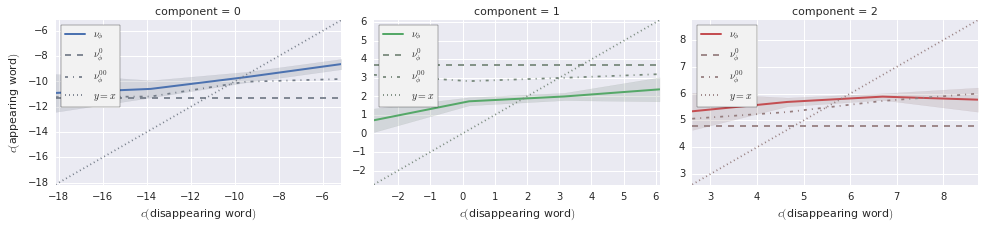

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.56518292  0.18596102  0.1397017   0.03987954  0.03939466]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.684102,-0.105015,0.318553,-0.583012,0.281770,0.014236
Component-1,0.435485,0.120455,-0.509782,-0.677968,0.276149,-0.008147
Component-2,0.577930,-0.106505,0.777459,-0.210511,0.051792,-0.056690


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 26988) |            | Elapsed Time: 0:00:16 ETA:  5 days, 6:29:02

  0% (  101 of 26988) |                    | Elapsed Time: 0:00:17 ETA:  0:04:13

  0% (  213 of 26988) |                    | Elapsed Time: 0:00:18 ETA:  0:03:56

  1% (  338 of 26988) |                    | Elapsed Time: 0:00:19 ETA:  0:03:46

  1% (  468 of 26988) |                    | Elapsed Time: 0:00:20 ETA:  0:03:34

  2% (  583 of 26988) |                    | Elapsed Time: 0:00:21 ETA:  0:03:34

  2% (  675 of 26988) |                    | Elapsed Time: 0:00:23 ETA:  0:03:47

  2% (  788 of 26988) |                    | Elapsed Time: 0:00:24 ETA:  0:03:44

  3% (  896 of 26988) |                    | Elapsed Time: 0:00:25 ETA:  0:03:41

  3% ( 1013 of 26988) |                    | Elapsed Time: 0:00:26 ETA:  0:03:47

  4% ( 1115 of 26988) |                    | Elapsed Time: 0:00:27 ETA:  0:03:47

  4% ( 1216 of 26988) |                    | Elapsed Time: 0:00:28 ETA:  0:03:56

  4% ( 1317 of 26988) |                    | Elapsed Time: 0:00:29 ETA:  0:04:00

  5% ( 1350 of 26988) |#                   | Elapsed Time: 0:00:29 ETA:  0:03:48

  5% ( 1451 of 26988) |#                   | Elapsed Time: 0:00:30 ETA:  0:03:50

  5% ( 1552 of 26988) |#                   | Elapsed Time: 0:00:31 ETA:  0:03:53

  6% ( 1650 of 26988) |#                   | Elapsed Time: 0:00:32 ETA:  0:03:56

  6% ( 1687 of 26988) |#                   | Elapsed Time: 0:00:32 ETA:  0:03:56

  6% ( 1790 of 26988) |#                   | Elapsed Time: 0:00:33 ETA:  0:03:53

  7% ( 1894 of 26988) |#                   | Elapsed Time: 0:00:34 ETA:  0:03:51

  7% ( 2000 of 26988) |#                   | Elapsed Time: 0:00:35 ETA:  0:03:49

  7% ( 2025 of 26988) |#                   | Elapsed Time: 0:00:36 ETA:  0:03:47

  7% ( 2130 of 26988) |#                   | Elapsed Time: 0:00:37 ETA:  0:03:46

  8% ( 2233 of 26988) |#                   | Elapsed Time: 0:00:38 ETA:  0:03:44

  8% ( 2335 of 26988) |#                   | Elapsed Time: 0:00:39 ETA:  0:03:43

  8% ( 2362 of 26988) |#                   | Elapsed Time: 0:00:39 ETA:  0:03:41

  9% ( 2437 of 26988) |#                   | Elapsed Time: 0:00:40 ETA:  0:03:50

  9% ( 2529 of 26988) |#                   | Elapsed Time: 0:00:41 ETA:  0:03:53

  9% ( 2629 of 26988) |#                   | Elapsed Time: 0:00:42 ETA:  0:03:53

 10% ( 2699 of 26988) |##                  | Elapsed Time: 0:00:43 ETA:  0:03:59

 10% ( 2798 of 26988) |##                  | Elapsed Time: 0:00:44 ETA:  0:03:58

 10% ( 2871 of 26988) |##                  | Elapsed Time: 0:00:45 ETA:  0:04:09

 10% ( 2941 of 26988) |##                  | Elapsed Time: 0:00:46 ETA:  0:04:22

 11% ( 3013 of 26988) |##                  | Elapsed Time: 0:00:47 ETA:  0:04:34

 11% ( 3037 of 26988) |##                  | Elapsed Time: 0:00:47 ETA:  0:04:38

 11% ( 3123 of 26988) |##                  | Elapsed Time: 0:00:48 ETA:  0:04:33

 11% ( 3219 of 26988) |##                  | Elapsed Time: 0:00:49 ETA:  0:04:30

 12% ( 3303 of 26988) |##                  | Elapsed Time: 0:00:50 ETA:  0:04:36

 12% ( 3374 of 26988) |##                  | Elapsed Time: 0:00:51 ETA:  0:04:35

 12% ( 3461 of 26988) |##                  | Elapsed Time: 0:00:52 ETA:  0:04:40

 13% ( 3545 of 26988) |##                  | Elapsed Time: 0:00:53 ETA:  0:04:33

 13% ( 3646 of 26988) |##                  | Elapsed Time: 0:00:54 ETA:  0:04:18

 13% ( 3711 of 26988) |##                  | Elapsed Time: 0:00:55 ETA:  0:04:07

 14% ( 3809 of 26988) |##                  | Elapsed Time: 0:00:56 ETA:  0:04:00

 14% ( 3900 of 26988) |##                  | Elapsed Time: 0:00:57 ETA:  0:03:57

 14% ( 3993 of 26988) |##                  | Elapsed Time: 0:00:58 ETA:  0:03:57

 15% ( 4049 of 26988) |###                 | Elapsed Time: 0:00:58 ETA:  0:03:55

 15% ( 4130 of 26988) |###                 | Elapsed Time: 0:00:59 ETA:  0:03:58

 15% ( 4226 of 26988) |###                 | Elapsed Time: 0:01:00 ETA:  0:03:53

 15% ( 4318 of 26988) |###                 | Elapsed Time: 0:01:01 ETA:  0:03:48

 16% ( 4386 of 26988) |###                 | Elapsed Time: 0:01:02 ETA:  0:03:49

 16% ( 4487 of 26988) |###                 | Elapsed Time: 0:01:03 ETA:  0:03:47

 17% ( 4591 of 26988) |###                 | Elapsed Time: 0:01:04 ETA:  0:03:44

 17% ( 4696 of 26988) |###                 | Elapsed Time: 0:01:05 ETA:  0:03:38

 17% ( 4723 of 26988) |###                 | Elapsed Time: 0:01:05 ETA:  0:03:36

 17% ( 4815 of 26988) |###                 | Elapsed Time: 0:01:06 ETA:  0:03:34

 18% ( 4887 of 26988) |###                 | Elapsed Time: 0:01:07 ETA:  0:03:36

 18% ( 4961 of 26988) |###                 | Elapsed Time: 0:01:08 ETA:  0:03:44

 18% ( 5037 of 26988) |###                 | Elapsed Time: 0:01:09 ETA:  0:03:49

 18% ( 5061 of 26988) |###                 | Elapsed Time: 0:01:10 ETA:  0:03:51

 19% ( 5150 of 26988) |###                 | Elapsed Time: 0:01:11 ETA:  0:03:56

 19% ( 5248 of 26988) |###                 | Elapsed Time: 0:01:12 ETA:  0:03:57

 19% ( 5336 of 26988) |###                 | Elapsed Time: 0:01:13 ETA:  0:04:05

 20% ( 5398 of 26988) |####                | Elapsed Time: 0:01:13 ETA:  0:04:09

 20% ( 5474 of 26988) |####                | Elapsed Time: 0:01:14 ETA:  0:04:17

 20% ( 5563 of 26988) |####                | Elapsed Time: 0:01:15 ETA:  0:04:07

 20% ( 5660 of 26988) |####                | Elapsed Time: 0:01:16 ETA:  0:03:55

 21% ( 5735 of 26988) |####                | Elapsed Time: 0:01:17 ETA:  0:03:47

 21% ( 5813 of 26988) |####                | Elapsed Time: 0:01:18 ETA:  0:03:51

 21% ( 5904 of 26988) |####                | Elapsed Time: 0:01:19 ETA:  0:03:49

 22% ( 5994 of 26988) |####                | Elapsed Time: 0:01:20 ETA:  0:03:51

 22% ( 6073 of 26988) |####                | Elapsed Time: 0:01:21 ETA:  0:03:51

 22% ( 6164 of 26988) |####                | Elapsed Time: 0:01:22 ETA:  0:03:46

 23% ( 6243 of 26988) |####                | Elapsed Time: 0:01:23 ETA:  0:03:43

 23% ( 6318 of 26988) |####                | Elapsed Time: 0:01:24 ETA:  0:03:48

 23% ( 6410 of 26988) |####                | Elapsed Time: 0:01:25 ETA:  0:03:49

 24% ( 6484 of 26988) |####                | Elapsed Time: 0:01:26 ETA:  0:03:56

 24% ( 6574 of 26988) |####                | Elapsed Time: 0:01:27 ETA:  0:03:50

 24% ( 6661 of 26988) |####                | Elapsed Time: 0:01:28 ETA:  0:03:51

 25% ( 6748 of 26988) |#####               | Elapsed Time: 0:01:29 ETA:  0:03:53

 25% ( 6839 of 26988) |#####               | Elapsed Time: 0:01:30 ETA:  0:03:52

 25% ( 6932 of 26988) |#####               | Elapsed Time: 0:01:31 ETA:  0:03:44

 26% ( 7029 of 26988) |#####               | Elapsed Time: 0:01:32 ETA:  0:03:34

 26% ( 7085 of 26988) |#####               | Elapsed Time: 0:01:33 ETA:  0:03:33

 26% ( 7182 of 26988) |#####               | Elapsed Time: 0:01:34 ETA:  0:03:22

 26% ( 7265 of 26988) |#####               | Elapsed Time: 0:01:35 ETA:  0:03:23

 27% ( 7363 of 26988) |#####               | Elapsed Time: 0:01:36 ETA:  0:03:18

 27% ( 7422 of 26988) |#####               | Elapsed Time: 0:01:37 ETA:  0:03:21

 27% ( 7494 of 26988) |#####               | Elapsed Time: 0:01:38 ETA:  0:03:28

 28% ( 7584 of 26988) |#####               | Elapsed Time: 0:01:39 ETA:  0:03:27

 28% ( 7673 of 26988) |#####               | Elapsed Time: 0:01:40 ETA:  0:03:28

 28% ( 7760 of 26988) |#####               | Elapsed Time: 0:01:41 ETA:  0:03:40

 29% ( 7831 of 26988) |#####               | Elapsed Time: 0:01:42 ETA:  0:03:52

 29% ( 7921 of 26988) |#####               | Elapsed Time: 0:01:43 ETA:  0:03:47

 29% ( 8018 of 26988) |#####               | Elapsed Time: 0:01:44 ETA:  0:03:47

 30% ( 8097 of 26988) |######              | Elapsed Time: 0:01:45 ETA:  0:03:38

 30% ( 8185 of 26988) |######              | Elapsed Time: 0:01:46 ETA:  0:03:29

 30% ( 8266 of 26988) |######              | Elapsed Time: 0:01:47 ETA:  0:03:33

 30% ( 8330 of 26988) |######              | Elapsed Time: 0:01:48 ETA:  0:03:44

 31% ( 8394 of 26988) |######              | Elapsed Time: 0:01:49 ETA:  0:03:49

 31% ( 8434 of 26988) |######              | Elapsed Time: 0:01:50 ETA:  0:03:54

 31% ( 8498 of 26988) |######              | Elapsed Time: 0:01:51 ETA:  0:03:57

 31% ( 8559 of 26988) |######              | Elapsed Time: 0:01:52 ETA:  0:04:12

 32% ( 8644 of 26988) |######              | Elapsed Time: 0:01:53 ETA:  0:04:18

 32% ( 8727 of 26988) |######              | Elapsed Time: 0:01:54 ETA:  0:04:20

 32% ( 8772 of 26988) |######              | Elapsed Time: 0:01:54 ETA:  0:04:24

 32% ( 8859 of 26988) |######              | Elapsed Time: 0:01:55 ETA:  0:04:18

 33% ( 8945 of 26988) |######              | Elapsed Time: 0:01:56 ETA:  0:04:03

 33% ( 9029 of 26988) |######              | Elapsed Time: 0:01:57 ETA:  0:03:50

 33% ( 9109 of 26988) |######              | Elapsed Time: 0:01:58 ETA:  0:03:35

 34% ( 9194 of 26988) |######              | Elapsed Time: 0:01:59 ETA:  0:03:24

 34% ( 9274 of 26988) |######              | Elapsed Time: 0:02:00 ETA:  0:03:14

 34% ( 9356 of 26988) |######              | Elapsed Time: 0:02:01 ETA:  0:03:15

 35% ( 9446 of 26988) |#######             | Elapsed Time: 0:02:02 ETA:  0:03:17

 35% ( 9541 of 26988) |#######             | Elapsed Time: 0:02:03 ETA:  0:03:12

 35% ( 9627 of 26988) |#######             | Elapsed Time: 0:02:04 ETA:  0:03:11

 35% ( 9709 of 26988) |#######             | Elapsed Time: 0:02:05 ETA:  0:03:11

 36% ( 9765 of 26988) |#######             | Elapsed Time: 0:02:06 ETA:  0:03:30

 36% ( 9784 of 26988) |#######             | Elapsed Time: 0:02:06 ETA:  0:03:37

 36% ( 9868 of 26988) |#######             | Elapsed Time: 0:02:07 ETA:  0:03:33

 36% ( 9964 of 26988) |#######             | Elapsed Time: 0:02:08 ETA:  0:03:24

 37% (10060 of 26988) |#######             | Elapsed Time: 0:02:09 ETA:  0:03:13

 37% (10121 of 26988) |#######             | Elapsed Time: 0:02:10 ETA:  0:03:32

 37% (10178 of 26988) |#######             | Elapsed Time: 0:02:11 ETA:  0:03:50

 37% (10236 of 26988) |#######             | Elapsed Time: 0:02:12 ETA:  0:04:05

 38% (10332 of 26988) |#######             | Elapsed Time: 0:02:13 ETA:  0:03:38

 38% (10425 of 26988) |#######             | Elapsed Time: 0:02:14 ETA:  0:03:25

 38% (10458 of 26988) |#######             | Elapsed Time: 0:02:15 ETA:  0:03:26

 39% (10542 of 26988) |#######             | Elapsed Time: 0:02:16 ETA:  0:03:33

 39% (10633 of 26988) |#######             | Elapsed Time: 0:02:17 ETA:  0:03:35

 39% (10729 of 26988) |#######             | Elapsed Time: 0:02:18 ETA:  0:03:13

 40% (10796 of 26988) |########            | Elapsed Time: 0:02:19 ETA:  0:03:07

 40% (10899 of 26988) |########            | Elapsed Time: 0:02:20 ETA:  0:02:45

 40% (10992 of 26988) |########            | Elapsed Time: 0:02:21 ETA:  0:02:29

 41% (11086 of 26988) |########            | Elapsed Time: 0:02:22 ETA:  0:02:29

 41% (11133 of 26988) |########            | Elapsed Time: 0:02:22 ETA:  0:02:28

 41% (11230 of 26988) |########            | Elapsed Time: 0:02:23 ETA:  0:02:24

 41% (11330 of 26988) |########            | Elapsed Time: 0:02:24 ETA:  0:02:17

 42% (11422 of 26988) |########            | Elapsed Time: 0:02:25 ETA:  0:02:15

 42% (11470 of 26988) |########            | Elapsed Time: 0:02:26 ETA:  0:02:15

 42% (11550 of 26988) |########            | Elapsed Time: 0:02:27 ETA:  0:02:20

 43% (11640 of 26988) |########            | Elapsed Time: 0:02:28 ETA:  0:02:24

 43% (11718 of 26988) |########            | Elapsed Time: 0:02:29 ETA:  0:02:29

 43% (11808 of 26988) |########            | Elapsed Time: 0:02:30 ETA:  0:02:30

 44% (11904 of 26988) |########            | Elapsed Time: 0:02:31 ETA:  0:02:28

 44% (11995 of 26988) |########            | Elapsed Time: 0:02:32 ETA:  0:02:30

 44% (12074 of 26988) |########            | Elapsed Time: 0:02:33 ETA:  0:02:37

 45% (12145 of 26988) |#########           | Elapsed Time: 0:02:34 ETA:  0:02:41

 45% (12219 of 26988) |#########           | Elapsed Time: 0:02:35 ETA:  0:02:47

 45% (12305 of 26988) |#########           | Elapsed Time: 0:02:36 ETA:  0:02:43

 45% (12396 of 26988) |#########           | Elapsed Time: 0:02:37 ETA:  0:02:42

 46% (12482 of 26988) |#########           | Elapsed Time: 0:02:37 ETA:  0:02:33

 46% (12588 of 26988) |#########           | Elapsed Time: 0:02:38 ETA:  0:02:25

 46% (12684 of 26988) |#########           | Elapsed Time: 0:02:39 ETA:  0:02:24

 47% (12778 of 26988) |#########           | Elapsed Time: 0:02:40 ETA:  0:02:22

 47% (12820 of 26988) |#########           | Elapsed Time: 0:02:41 ETA:  0:02:17

 47% (12924 of 26988) |#########           | Elapsed Time: 0:02:42 ETA:  0:02:07

 48% (13010 of 26988) |#########           | Elapsed Time: 0:02:43 ETA:  0:02:02

 48% (13091 of 26988) |#########           | Elapsed Time: 0:02:44 ETA:  0:02:03

 48% (13157 of 26988) |#########           | Elapsed Time: 0:02:45 ETA:  0:02:00

 49% (13257 of 26988) |#########           | Elapsed Time: 0:02:46 ETA:  0:01:59

 49% (13356 of 26988) |#########           | Elapsed Time: 0:02:47 ETA:  0:02:00

 49% (13445 of 26988) |#########           | Elapsed Time: 0:02:48 ETA:  0:02:02

 50% (13495 of 26988) |##########          | Elapsed Time: 0:02:48 ETA:  0:02:02

 50% (13589 of 26988) |##########          | Elapsed Time: 0:02:49 ETA:  0:02:01

 50% (13684 of 26988) |##########          | Elapsed Time: 0:02:50 ETA:  0:02:03

 50% (13759 of 26988) |##########          | Elapsed Time: 0:02:51 ETA:  0:02:07

 51% (13832 of 26988) |##########          | Elapsed Time: 0:02:52 ETA:  0:02:02

 51% (13915 of 26988) |##########          | Elapsed Time: 0:02:53 ETA:  0:02:05

 51% (14008 of 26988) |##########          | Elapsed Time: 0:02:54 ETA:  0:02:07

 52% (14092 of 26988) |##########          | Elapsed Time: 0:02:55 ETA:  0:02:12

 52% (14169 of 26988) |##########          | Elapsed Time: 0:02:56 ETA:  0:02:12

 52% (14262 of 26988) |##########          | Elapsed Time: 0:02:57 ETA:  0:02:09

 53% (14361 of 26988) |##########          | Elapsed Time: 0:02:58 ETA:  0:02:06

 53% (14455 of 26988) |##########          | Elapsed Time: 0:02:59 ETA:  0:02:06

 53% (14507 of 26988) |##########          | Elapsed Time: 0:03:00 ETA:  0:02:00

 54% (14611 of 26988) |##########          | Elapsed Time: 0:03:01 ETA:  0:01:54

 54% (14707 of 26988) |##########          | Elapsed Time: 0:03:02 ETA:  0:01:49

 54% (14815 of 26988) |##########          | Elapsed Time: 0:03:03 ETA:  0:01:42

 55% (14844 of 26988) |###########         | Elapsed Time: 0:03:03 ETA:  0:01:39

 55% (14937 of 26988) |###########         | Elapsed Time: 0:03:04 ETA:  0:01:37

 55% (15028 of 26988) |###########         | Elapsed Time: 0:03:05 ETA:  0:01:37

 56% (15120 of 26988) |###########         | Elapsed Time: 0:03:06 ETA:  0:01:38

 56% (15181 of 26988) |###########         | Elapsed Time: 0:03:07 ETA:  0:01:38

 56% (15274 of 26988) |###########         | Elapsed Time: 0:03:08 ETA:  0:01:35

 56% (15375 of 26988) |###########         | Elapsed Time: 0:03:09 ETA:  0:01:35

 57% (15478 of 26988) |###########         | Elapsed Time: 0:03:10 ETA:  0:01:31

 57% (15519 of 26988) |###########         | Elapsed Time: 0:03:10 ETA:  0:01:38

 57% (15617 of 26988) |###########         | Elapsed Time: 0:03:11 ETA:  0:01:34

 58% (15710 of 26988) |###########         | Elapsed Time: 0:03:12 ETA:  0:01:33

 58% (15803 of 26988) |###########         | Elapsed Time: 0:03:13 ETA:  0:01:31

 58% (15856 of 26988) |###########         | Elapsed Time: 0:03:14 ETA:  0:01:30

 59% (15940 of 26988) |###########         | Elapsed Time: 0:03:15 ETA:  0:01:33

 59% (16023 of 26988) |###########         | Elapsed Time: 0:03:16 ETA:  0:01:36

 59% (16112 of 26988) |###########         | Elapsed Time: 0:03:17 ETA:  0:01:39

 60% (16193 of 26988) |############        | Elapsed Time: 0:03:18 ETA:  0:01:41

 60% (16298 of 26988) |############        | Elapsed Time: 0:03:19 ETA:  0:01:33

 60% (16370 of 26988) |############        | Elapsed Time: 0:03:20 ETA:  0:01:42

 60% (16456 of 26988) |############        | Elapsed Time: 0:03:21 ETA:  0:01:44

 61% (16531 of 26988) |############        | Elapsed Time: 0:03:21 ETA:  0:01:44

 61% (16602 of 26988) |############        | Elapsed Time: 0:03:22 ETA:  0:01:51

 61% (16689 of 26988) |############        | Elapsed Time: 0:03:23 ETA:  0:01:49

 62% (16748 of 26988) |############        | Elapsed Time: 0:03:24 ETA:  0:01:58

 62% (16821 of 26988) |############        | Elapsed Time: 0:03:25 ETA:  0:02:04

 62% (16868 of 26988) |############        | Elapsed Time: 0:03:26 ETA:  0:02:07

 62% (16963 of 26988) |############        | Elapsed Time: 0:03:27 ETA:  0:02:10

 63% (17064 of 26988) |############        | Elapsed Time: 0:03:28 ETA:  0:01:55

 63% (17157 of 26988) |############        | Elapsed Time: 0:03:29 ETA:  0:01:51

 63% (17205 of 26988) |############        | Elapsed Time: 0:03:30 ETA:  0:01:55

 64% (17294 of 26988) |############        | Elapsed Time: 0:03:31 ETA:  0:01:46

 64% (17390 of 26988) |############        | Elapsed Time: 0:03:32 ETA:  0:01:40

 64% (17479 of 26988) |############        | Elapsed Time: 0:03:33 ETA:  0:01:26

 65% (17543 of 26988) |#############       | Elapsed Time: 0:03:33 ETA:  0:01:20

 65% (17625 of 26988) |#############       | Elapsed Time: 0:03:34 ETA:  0:01:25

 65% (17712 of 26988) |#############       | Elapsed Time: 0:03:35 ETA:  0:01:27

 65% (17805 of 26988) |#############       | Elapsed Time: 0:03:36 ETA:  0:01:29

 66% (17880 of 26988) |#############       | Elapsed Time: 0:03:37 ETA:  0:01:33

 66% (17982 of 26988) |#############       | Elapsed Time: 0:03:38 ETA:  0:01:23

 67% (18084 of 26988) |#############       | Elapsed Time: 0:03:39 ETA:  0:01:17

 67% (18177 of 26988) |#############       | Elapsed Time: 0:03:40 ETA:  0:01:18

 67% (18217 of 26988) |#############       | Elapsed Time: 0:03:41 ETA:  0:01:15

 67% (18306 of 26988) |#############       | Elapsed Time: 0:03:42 ETA:  0:01:13

 68% (18359 of 26988) |#############       | Elapsed Time: 0:03:43 ETA:  0:01:24

 68% (18449 of 26988) |#############       | Elapsed Time: 0:03:44 ETA:  0:01:22

 68% (18532 of 26988) |#############       | Elapsed Time: 0:03:45 ETA:  0:01:25

 68% (18555 of 26988) |#############       | Elapsed Time: 0:03:45 ETA:  0:01:21

 69% (18642 of 26988) |#############       | Elapsed Time: 0:03:46 ETA:  0:01:27

 69% (18717 of 26988) |#############       | Elapsed Time: 0:03:47 ETA:  0:01:40

 69% (18791 of 26988) |#############       | Elapsed Time: 0:03:48 ETA:  0:01:48

 70% (18892 of 26988) |##############      | Elapsed Time: 0:03:49 ETA:  0:01:40

 70% (18983 of 26988) |##############      | Elapsed Time: 0:03:50 ETA:  0:01:38

 70% (19069 of 26988) |##############      | Elapsed Time: 0:03:51 ETA:  0:01:22

 70% (19147 of 26988) |##############      | Elapsed Time: 0:03:52 ETA:  0:01:26

 71% (19229 of 26988) |##############      | Elapsed Time: 0:03:53 ETA:  0:01:32

 71% (19290 of 26988) |##############      | Elapsed Time: 0:03:54 ETA:  0:01:43

 71% (19385 of 26988) |##############      | Elapsed Time: 0:03:55 ETA:  0:01:32

 72% (19474 of 26988) |##############      | Elapsed Time: 0:03:56 ETA:  0:01:24

 72% (19567 of 26988) |##############      | Elapsed Time: 0:03:57 ETA:  0:01:26

 72% (19650 of 26988) |##############      | Elapsed Time: 0:03:58 ETA:  0:01:29

 73% (19742 of 26988) |##############      | Elapsed Time: 0:03:59 ETA:  0:01:25

 73% (19829 of 26988) |##############      | Elapsed Time: 0:04:00 ETA:  0:01:20

 73% (19904 of 26988) |##############      | Elapsed Time: 0:04:01 ETA:  0:01:13

 74% (19990 of 26988) |##############      | Elapsed Time: 0:04:02 ETA:  0:01:10

 74% (20088 of 26988) |##############      | Elapsed Time: 0:04:03 ETA:  0:00:55

 74% (20193 of 26988) |##############      | Elapsed Time: 0:04:04 ETA:  0:00:50

 75% (20242 of 26988) |###############     | Elapsed Time: 0:04:05 ETA:  0:00:51

 75% (20334 of 26988) |###############     | Elapsed Time: 0:04:06 ETA:  0:00:52

 75% (20425 of 26988) |###############     | Elapsed Time: 0:04:07 ETA:  0:00:48

 75% (20510 of 26988) |###############     | Elapsed Time: 0:04:08 ETA:  0:00:50

 76% (20579 of 26988) |###############     | Elapsed Time: 0:04:09 ETA:  0:00:55

 76% (20669 of 26988) |###############     | Elapsed Time: 0:04:10 ETA:  0:00:54

 76% (20752 of 26988) |###############     | Elapsed Time: 0:04:11 ETA:  0:00:54

 77% (20841 of 26988) |###############     | Elapsed Time: 0:04:12 ETA:  0:00:57

 77% (20916 of 26988) |###############     | Elapsed Time: 0:04:12 ETA:  0:01:02

 77% (21013 of 26988) |###############     | Elapsed Time: 0:04:13 ETA:  0:00:55

 78% (21096 of 26988) |###############     | Elapsed Time: 0:04:14 ETA:  0:00:57

 78% (21188 of 26988) |###############     | Elapsed Time: 0:04:15 ETA:  0:00:56

 78% (21254 of 26988) |###############     | Elapsed Time: 0:04:16 ETA:  0:00:59

 79% (21328 of 26988) |###############     | Elapsed Time: 0:04:17 ETA:  0:00:56

 79% (21411 of 26988) |###############     | Elapsed Time: 0:04:18 ETA:  0:00:59

 79% (21495 of 26988) |###############     | Elapsed Time: 0:04:19 ETA:  0:00:57

 80% (21591 of 26988) |################    | Elapsed Time: 0:04:20 ETA:  0:01:03

 80% (21687 of 26988) |################    | Elapsed Time: 0:04:21 ETA:  0:01:02

 80% (21781 of 26988) |################    | Elapsed Time: 0:04:22 ETA:  0:00:56

 80% (21847 of 26988) |################    | Elapsed Time: 0:04:23 ETA:  0:01:07

 81% (21928 of 26988) |################    | Elapsed Time: 0:04:24 ETA:  0:01:00

 81% (22000 of 26988) |################    | Elapsed Time: 0:04:25 ETA:  0:00:59

 81% (22094 of 26988) |################    | Elapsed Time: 0:04:26 ETA:  0:00:53

 82% (22183 of 26988) |################    | Elapsed Time: 0:04:27 ETA:  0:00:50

 82% (22266 of 26988) |################    | Elapsed Time: 0:04:28 ETA:  0:00:43

 82% (22327 of 26988) |################    | Elapsed Time: 0:04:29 ETA:  0:00:54

 83% (22416 of 26988) |################    | Elapsed Time: 0:04:30 ETA:  0:00:56

 83% (22512 of 26988) |################    | Elapsed Time: 0:04:31 ETA:  0:00:54

 83% (22603 of 26988) |################    | Elapsed Time: 0:04:32 ETA:  0:00:41

 84% (22685 of 26988) |################    | Elapsed Time: 0:04:33 ETA:  0:00:43

 84% (22759 of 26988) |################    | Elapsed Time: 0:04:34 ETA:  0:00:42

 84% (22842 of 26988) |################    | Elapsed Time: 0:04:35 ETA:  0:00:45

 85% (22940 of 26988) |#################   | Elapsed Time: 0:04:36 ETA:  0:00:44

 85% (23018 of 26988) |#################   | Elapsed Time: 0:04:37 ETA:  0:00:36

 85% (23102 of 26988) |#################   | Elapsed Time: 0:04:38 ETA:  0:00:37

 85% (23188 of 26988) |#################   | Elapsed Time: 0:04:39 ETA:  0:00:41

 86% (23278 of 26988) |#################   | Elapsed Time: 0:04:40 ETA:  0:00:42

 86% (23376 of 26988) |#################   | Elapsed Time: 0:04:41 ETA:  0:00:28

 86% (23462 of 26988) |#################   | Elapsed Time: 0:04:42 ETA:  0:00:25

 87% (23547 of 26988) |#################   | Elapsed Time: 0:04:43 ETA:  0:00:30

 87% (23615 of 26988) |#################   | Elapsed Time: 0:04:44 ETA:  0:00:32

 87% (23706 of 26988) |#################   | Elapsed Time: 0:04:45 ETA:  0:00:25

 88% (23808 of 26988) |#################   | Elapsed Time: 0:04:46 ETA:  0:00:16

 88% (23897 of 26988) |#################   | Elapsed Time: 0:04:47 ETA:  0:00:13

 88% (23952 of 26988) |#################   | Elapsed Time: 0:04:48 ETA:  0:00:12

 89% (24048 of 26988) |#################   | Elapsed Time: 0:04:49 ETA:  0:00:08

 89% (24141 of 26988) |#################   | Elapsed Time: 0:04:50 ETA:  0:00:09

 89% (24234 of 26988) |#################   | Elapsed Time: 0:04:51 ETA:  0:00:06

 90% (24290 of 26988) |##################  | Elapsed Time: 0:04:52 ETA:  0:00:01

 90% (24390 of 26988) |##################  | Elapsed Time: 0:04:53 ETA:  0:00:00

 90% (24488 of 26988) |##################  | Elapsed Time: 0:04:54 ETA:  0:00:00

 91% (24584 of 26988) |##################  | Elapsed Time: 0:04:55 ETA:  0:00:00

 91% (24627 of 26988) |##################  | Elapsed Time: 0:04:55 ETA:  0:00:00

 91% (24720 of 26988) |##################  | Elapsed Time: 0:04:56 ETA:  0:00:00

 91% (24812 of 26988) |##################  | Elapsed Time: 0:04:57 ETA:  0:00:00

 92% (24903 of 26988) |##################  | Elapsed Time: 0:04:58 ETA:  0:00:00

 92% (24964 of 26988) |##################  | Elapsed Time: 0:04:59 ETA:  0:00:00

 92% (25063 of 26988) |##################  | Elapsed Time: 0:05:00 ETA:  0:00:00

 93% (25154 of 26988) |##################  | Elapsed Time: 0:05:01 ETA:  0:00:00

 93% (25243 of 26988) |##################  | Elapsed Time: 0:05:02 ETA:  0:00:00

 93% (25302 of 26988) |##################  | Elapsed Time: 0:05:03 ETA:  0:00:00

 94% (25390 of 26988) |##################  | Elapsed Time: 0:05:04 ETA:  0:00:00

 94% (25474 of 26988) |##################  | Elapsed Time: 0:05:05 ETA:  0:00:00

 94% (25561 of 26988) |##################  | Elapsed Time: 0:05:06 ETA:  0:00:00

 95% (25639 of 26988) |################### | Elapsed Time: 0:05:07 ETA:  0:00:02

 95% (25735 of 26988) |################### | Elapsed Time: 0:05:08 ETA:  0:00:00

 95% (25815 of 26988) |################### | Elapsed Time: 0:05:09 ETA:  0:00:02

 95% (25908 of 26988) |################### | Elapsed Time: 0:05:10 ETA:  0:00:00

 96% (25976 of 26988) |################### | Elapsed Time: 0:05:10 ETA:  0:00:00

 96% (26054 of 26988) |################### | Elapsed Time: 0:05:11 ETA:  0:00:03

 96% (26153 of 26988) |################### | Elapsed Time: 0:05:12 ETA:  0:00:00

 97% (26245 of 26988) |################### | Elapsed Time: 0:05:13 ETA:  0:00:00

 97% (26314 of 26988) |################### | Elapsed Time: 0:05:14 ETA:  0:00:00

 97% (26416 of 26988) |################### | Elapsed Time: 0:05:15 ETA:  0:00:00

 98% (26512 of 26988) |################### | Elapsed Time: 0:05:16 ETA:  0:00:00

 98% (26599 of 26988) |################### | Elapsed Time: 0:05:17 ETA:  0:00:00

 98% (26651 of 26988) |################### | Elapsed Time: 0:05:18 ETA:  0:00:00

 99% (26732 of 26988) |################### | Elapsed Time: 0:05:19 ETA:  0:00:00

 99% (26824 of 26988) |################### | Elapsed Time: 0:05:20 ETA:  0:00:00

 99% (26913 of 26988) |################### | Elapsed Time: 0:05:21 ETA:  0:00:00

100% (26988 of 26988) |####################| Elapsed Time: 0:05:22 Time: 0:05:22


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

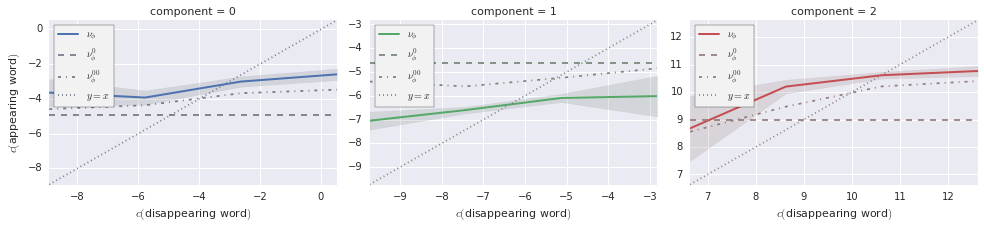

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1756 (cluster-unique) substitutions, but the PCA is in fact computed on 803 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.